<a href="https://colab.research.google.com/github/Saoudyahya/drawing-using-reinforcement-learning-RL-instead-of-pixel-generation/blob/main/drawing_using_reinforcement_learning_RL_instead_of_pixel_generation_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#@title test 1
%%html
<svg viewBox="0 0 1000 700" xmlns="http://www.w3.org/2000/svg">
  <!-- Background -->
  <rect width="1000" height="700" fill="#f8f9fa"/>

  <!-- Title -->
  <text x="500" y="40" font-family="Arial, sans-serif" font-size="24" font-weight="bold" text-anchor="middle" fill="#2c3e50">
    RL Drawing Agent Architecture
  </text>

  <!-- Environment Section -->
  <g id="environment">
    <rect x="50" y="80" width="200" height="280" fill="#e8f4f8" stroke="#3498db" stroke-width="2" rx="10"/>
    <text x="150" y="105" font-family="Arial, sans-serif" font-size="16" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      Drawing Environment
    </text>

    <!-- Canvas -->
    <rect x="80" y="130" width="140" height="140" fill="white" stroke="#34495e" stroke-width="2"/>
    <text x="150" y="210" font-family="Arial, sans-serif" font-size="14" text-anchor="middle" fill="#7f8c8d">
      Canvas (64×64)
    </text>

    <!-- Stroke info -->
    <text x="150" y="290" font-family="Arial, sans-serif" font-size="12" text-anchor="middle" fill="#34495e">
      Max Strokes: 20
    </text>
    <text x="150" y="310" font-family="Arial, sans-serif" font-size="12" text-anchor="middle" fill="#34495e">
      Step Count
    </text>
    <text x="150" y="340" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#7f8c8d">
      draw_stroke(x,y,color,width)
    </text>
  </g>

  <!-- Policy Network Section -->
  <g id="policy-network">
    <rect x="400" y="80" width="250" height="480" fill="#fff5e6" stroke="#f39c12" stroke-width="2" rx="10"/>
    <text x="525" y="105" font-family="Arial, sans-serif" font-size="16" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      Policy Network
    </text>

    <!-- Encoder -->
    <rect x="430" y="130" width="190" height="150" fill="#ffeaa7" stroke="#e17055" stroke-width="1.5" rx="5"/>
    <text x="525" y="150" font-family="Arial, sans-serif" font-size="13" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      Encoder (CNN)
    </text>

    <text x="525" y="175" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      Conv2d(3→32, stride=2)
    </text>
    <text x="525" y="195" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      Conv2d(32→64, stride=2)
    </text>
    <text x="525" y="215" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      Conv2d(64→128, stride=2)
    </text>
    <text x="525" y="235" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#7f8c8d">
      ReLU + Flatten
    </text>
    <text x="525" y="265" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#7f8c8d">
      Features: 128×8×8
    </text>

    <!-- Policy Head -->
    <rect x="430" y="300" width="190" height="120" fill="#dfe6e9" stroke="#636e72" stroke-width="1.5" rx="5"/>
    <text x="525" y="320" font-family="Arial, sans-serif" font-size="13" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      Policy Head
    </text>

    <text x="525" y="345" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      Linear(flat_size → 256)
    </text>
    <text x="525" y="365" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      Linear(256 → 256)
    </text>
    <text x="525" y="385" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      Linear(256 → 8)
    </text>
    <text x="525" y="405" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#7f8c8d">
      Sigmoid → [0,1]
    </text>

    <!-- Action Output -->
    <rect x="430" y="440" width="190" height="100" fill="#a29bfe" stroke="#6c5ce7" stroke-width="1.5" rx="5"/>
    <text x="525" y="460" font-family="Arial, sans-serif" font-size="13" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      Action (8 params)
    </text>
    <text x="525" y="480" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#2c3e50">
      [x1, y1, x2, y2,
    </text>
    <text x="525" y="497" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#2c3e50">
      r, g, b, width]
    </text>
    <text x="525" y="525" font-family="Arial, sans-serif" font-size="9" text-anchor="middle" fill="#34495e">
      + exploration noise
    </text>
  </g>

  <!-- RL Training Section -->
  <g id="rl-training">
    <rect x="750" y="80" width="200" height="280" fill="#e8f5e9" stroke="#27ae60" stroke-width="2" rx="10"/>
    <text x="850" y="105" font-family="Arial, sans-serif" font-size="16" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      RL Training
    </text>

    <!-- Target Image -->
    <rect x="780" y="130" width="140" height="140" fill="white" stroke="#34495e" stroke-width="2"/>
    <circle cx="850" cy="200" r="40" fill="#ff6b6b"/>
    <text x="850" y="285" font-family="Arial, sans-serif" font-size="12" text-anchor="middle" fill="#7f8c8d">
      Target Image
    </text>

    <!-- Reward -->
    <text x="850" y="310" font-family="Arial, sans-serif" font-size="13" font-weight="bold" text-anchor="middle" fill="#27ae60">
      Reward: -MSE
    </text>
    <text x="850" y="330" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      Compare canvas
    </text>
    <text x="850" y="347" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      with target
    </text>
  </g>

  <!-- Policy Gradient Update -->
  <g id="policy-gradient">
    <rect x="400" y="590" width="250" height="80" fill="#ffeef8" stroke="#e84393" stroke-width="2" rx="10"/>
    <text x="525" y="612" font-family="Arial, sans-serif" font-size="13" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      Policy Gradient Update
    </text>
    <text x="525" y="635" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      Loss = -Σ log_prob × return
    </text>
    <text x="525" y="655" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#7f8c8d">
      Adam optimizer (lr=1e-3)
    </text>
  </g>

  <!-- Arrows -->
  <!-- Environment to Policy -->
  <defs>
    <marker id="arrowhead" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto">
      <polygon points="0 0, 10 3, 0 6" fill="#34495e"/>
    </marker>
  </defs>

  <path d="M 250 220 L 400 220" stroke="#34495e" stroke-width="2" fill="none" marker-end="url(#arrowhead)"/>
  <text x="325" y="210" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
    State
  </text>

  <!-- Policy to Environment -->
  <path d="M 400 320 Q 300 320 250 280" stroke="#34495e" stroke-width="2" fill="none" marker-end="url(#arrowhead)"/>
  <text x="280" y="310" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
    Action
  </text>

  <!-- Environment to Reward -->
  <path d="M 250 180 Q 500 100 750 180" stroke="#27ae60" stroke-width="2" fill="none" marker-end="url(#arrowhead)" stroke-dasharray="5,5"/>
  <text x="500" y="130" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#27ae60">
    Canvas State
  </text>

  <!-- Reward to Policy Gradient -->
  <path d="M 850 360 L 850 580 L 650 580" stroke="#e84393" stroke-width="2" fill="none" marker-end="url(#arrowhead)"/>
  <text x="780" y="470" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#e84393">
    Reward
  </text>

  <!-- Policy Gradient to Policy -->
  <path d="M 525 590 L 525 560" stroke="#e84393" stroke-width="2" fill="none" marker-end="url(#arrowhead)"/>
  <text x="560" y="575" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#e84393">
    Update
  </text>

  <!-- Loop indicator -->
  <path d="M 150 370 L 150 600 L 390 630" stroke="#95a5a6" stroke-width="2" fill="none" marker-end="url(#arrowhead)" stroke-dasharray="3,3"/>
  <text x="200" y="615" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#7f8c8d">
    Episode Loop
  </text>
</svg>

Training RL drawing agent...
Episode 0, Reward: -0.1585, Best: -0.1585
Episode 10, Reward: -0.1655, Best: -0.1482
Episode 20, Reward: -0.1603, Best: -0.1482
Episode 30, Reward: -0.1446, Best: -0.1446
Episode 40, Reward: -0.1743, Best: -0.1446
Episode 50, Reward: -0.1620, Best: -0.1446
Episode 60, Reward: -0.1597, Best: -0.1446
Episode 70, Reward: -0.1684, Best: -0.1446
Episode 80, Reward: -0.1530, Best: -0.1446
Episode 90, Reward: -0.1584, Best: -0.1446
Episode 100, Reward: -0.1651, Best: -0.1446
Episode 110, Reward: -0.1452, Best: -0.1446
Episode 120, Reward: -0.1611, Best: -0.1446
Episode 130, Reward: -0.1564, Best: -0.1446
Episode 140, Reward: -0.1644, Best: -0.1446
Episode 150, Reward: -0.2688, Best: -0.1446
Episode 160, Reward: -0.2710, Best: -0.1446
Episode 170, Reward: -0.2739, Best: -0.1446
Episode 180, Reward: -0.2741, Best: -0.1446
Episode 190, Reward: -0.2593, Best: -0.1446
Result saved as 'rl_drawing_result.png'


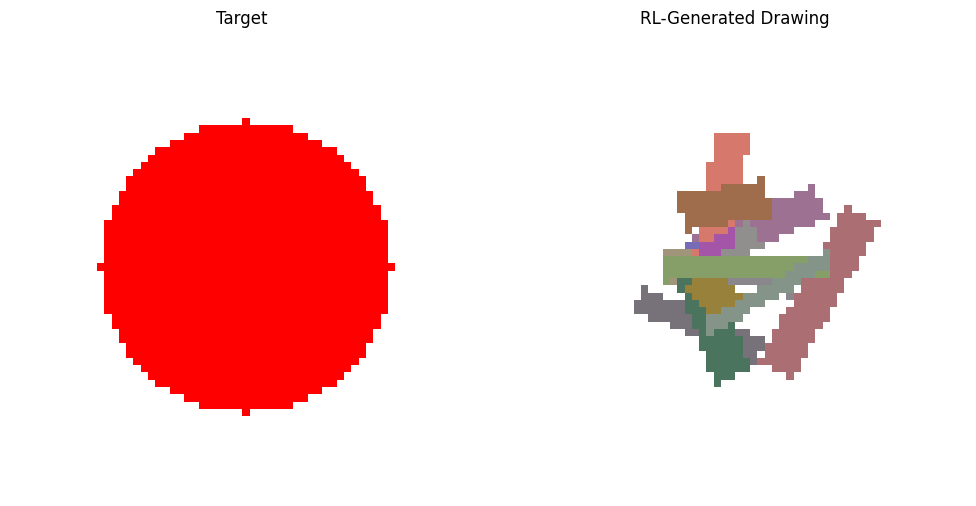

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch.nn.functional as F

# Drawing Environment
class DrawingEnv:
    def __init__(self, canvas_size=64, max_strokes=20):
        self.canvas_size = canvas_size
        self.max_strokes = max_strokes
        self.reset()

    def reset(self):
        """Reset canvas to blank state"""
        self.canvas = np.ones((self.canvas_size, self.canvas_size, 3), dtype=np.float32)
        self.step_count = 0
        return self.canvas.copy()

    def draw_stroke(self, x1, y1, x2, y2, color, width):
        """Draw a brush stroke on canvas"""
        # Convert normalized coordinates to pixel coordinates
        x1 = int(x1 * self.canvas_size)
        y1 = int(y1 * self.canvas_size)
        x2 = int(x2 * self.canvas_size)
        y2 = int(y2 * self.canvas_size)
        width = max(1, int(width * 10))

        # Create PIL image for drawing
        img = Image.fromarray((self.canvas * 255).astype(np.uint8))
        draw = ImageDraw.Draw(img)

        # Draw line
        rgb_color = tuple((np.array(color) * 255).astype(int))
        draw.line([x1, y1, x2, y2], fill=rgb_color, width=width)

        # Update canvas
        self.canvas = np.array(img).astype(np.float32) / 255.0
        return self.canvas.copy()

    def step(self, action):
        """Execute action: [x1, y1, x2, y2, r, g, b, width]"""
        x1, y1, x2, y2, r, g, b, width = action

        # Clip values to valid range
        x1, y1, x2, y2 = np.clip([x1, y1, x2, y2], 0, 1)
        r, g, b = np.clip([r, g, b], 0, 1)
        width = np.clip(width, 0, 1)

        # Draw stroke
        self.draw_stroke(x1, y1, x2, y2, [r, g, b], width)

        self.step_count += 1
        done = self.step_count >= self.max_strokes

        return self.canvas.copy(), done


# Policy Network
class StrokePolicy(nn.Module):
    def __init__(self, canvas_size=64, hidden_size=256):
        super().__init__()

        # Encoder: process current canvas
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
        )

        # Calculate flattened size
        flat_size = 128 * (canvas_size // 8) * (canvas_size // 8)

        # Policy head: output stroke parameters
        self.policy = nn.Sequential(
            nn.Linear(flat_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 8),  # 8 action parameters
            nn.Sigmoid()  # Output in [0, 1]
        )

    def forward(self, canvas):
        # canvas: (batch, H, W, 3) -> (batch, 3, H, W)
        if len(canvas.shape) == 3:
            canvas = canvas.unsqueeze(0)
        canvas = canvas.permute(0, 3, 1, 2)

        features = self.encoder(canvas)
        action_params = self.policy(features)
        return action_params


# RL Training
class RLDrawer:
    def __init__(self, target_image, canvas_size=64, max_strokes=20):
        self.env = DrawingEnv(canvas_size, max_strokes)
        self.policy = StrokePolicy(canvas_size)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=1e-3)

        # Prepare target image
        if isinstance(target_image, np.ndarray):
            self.target = target_image
        else:
            self.target = np.array(target_image.resize((canvas_size, canvas_size))).astype(np.float32) / 255.0

    def compute_reward(self, canvas):
        """Compute how similar canvas is to target (negative MSE)"""
        mse = np.mean((canvas - self.target) ** 2)
        return -mse  # Higher is better

    def train_episode(self):
        """Run one episode and update policy"""
        state = self.env.reset()

        log_probs = []
        rewards = []
        states = []

        done = False
        while not done:
            # Get action from policy
            state_tensor = torch.FloatTensor(state)
            action_params = self.policy(state_tensor)

            # Add noise for exploration
            action = action_params.detach().numpy()[0]
            action = np.clip(action + np.random.normal(0, 0.1, action.shape), 0, 1)

            # Take action
            next_state, done = self.env.step(action)

            # Compute reward
            reward = self.compute_reward(next_state)

            # Store trajectory
            states.append(state)
            rewards.append(reward)

            # Compute log probability (simple Gaussian assumption)
            log_prob = -torch.sum((action_params - torch.FloatTensor(action)) ** 2)
            log_probs.append(log_prob)

            state = next_state

        # Compute returns (cumulative rewards)
        returns = []
        G = 0
        for r in reversed(rewards):
            G = r + 0.99 * G  # discount factor
            returns.insert(0, G)

        returns = torch.FloatTensor(returns)
        returns = (returns - returns.mean()) / (returns.std() + 1e-8)

        # Policy gradient update
        policy_loss = []
        for log_prob, G in zip(log_probs, returns):
            policy_loss.append(-log_prob * G)

        policy_loss = torch.stack(policy_loss).sum()

        self.optimizer.zero_grad()
        policy_loss.backward()
        self.optimizer.step()

        return rewards[-1], self.env.canvas

    def train(self, episodes=100):
        """Train the agent"""
        best_reward = -float('inf')
        best_canvas = None

        for episode in range(episodes):
            reward, canvas = self.train_episode()

            if reward > best_reward:
                best_reward = reward
                best_canvas = canvas.copy()

            if episode % 10 == 0:
                print(f"Episode {episode}, Reward: {reward:.4f}, Best: {best_reward:.4f}")

        return best_canvas


# Example usage
if __name__ == "__main__":
    # Create a simple target image (circle)
    target = np.ones((64, 64, 3), dtype=np.float32)
    y, x = np.ogrid[:64, :64]
    mask = (x - 32)**2 + (y - 32)**2 <= 20**2
    target[mask] = [1.0, 0.0, 0.0]  # Red circle

    # Train agent
    print("Training RL drawing agent...")
    drawer = RLDrawer(target, canvas_size=64, max_strokes=15)
    final_canvas = drawer.train(episodes=200)

    # Visualize results
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(target)
    axes[0].set_title("Target")
    axes[0].axis('off')

    axes[1].imshow(final_canvas)
    axes[1].set_title("RL-Generated Drawing")
    axes[1].axis('off')

    plt.tight_layout()
    plt.savefig('rl_drawing_result.png', dpi=150, bbox_inches='tight')
    print("Result saved as 'rl_drawing_result.png'")
    plt.show()

In [6]:
#@title test 2

%%html
<svg viewBox="0 0 1200 800" xmlns="http://www.w3.org/2000/svg">
  <!-- Background -->
  <defs>
    <linearGradient id="bgGrad" x1="0%" y1="0%" x2="100%" y2="100%">
      <stop offset="0%" style="stop-color:#f0f4f8;stop-opacity:1" />
      <stop offset="100%" style="stop-color:#e6eef5;stop-opacity:1" />
    </linearGradient>

    <marker id="arrowhead" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto">
      <polygon points="0 0, 10 3, 0 6" fill="#34495e"/>
    </marker>

    <marker id="arrowGreen" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto">
      <polygon points="0 0, 10 3, 0 6" fill="#27ae60"/>
    </marker>

    <marker id="arrowPurple" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto">
      <polygon points="0 0, 10 3, 0 6" fill="#8e44ad"/>
    </marker>
  </defs>

  <rect width="1200" height="800" fill="url(#bgGrad)"/>

  <!-- Title -->
  <text x="600" y="45" font-family="Arial, sans-serif" font-size="28" font-weight="bold" text-anchor="middle" fill="#2c3e50">
    RL Drawing Agent: Training Loop
  </text>

  <!-- Main Training Loop Box -->
  <rect x="50" y="80" width="1100" height="660" fill="none" stroke="#95a5a6" stroke-width="3" stroke-dasharray="10,5" rx="15"/>
  <text x="600" y="105" font-family="Arial, sans-serif" font-size="14" text-anchor="middle" fill="#7f8c8d" font-style="italic">
    Episode Loop (200 episodes)
  </text>

  <!-- Step 1: Environment Reset -->
  <g id="reset">
    <rect x="100" y="140" width="200" height="120" fill="#ecf0f1" stroke="#34495e" stroke-width="2" rx="8"/>
    <text x="200" y="165" font-family="Arial, sans-serif" font-size="16" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      1. Reset Environment
    </text>
    <rect x="130" y="185" width="140" height="50" fill="white" stroke="#7f8c8d" stroke-width="1.5"/>
    <text x="200" y="208" font-family="Arial, sans-serif" font-size="12" text-anchor="middle" fill="#34495e">
      Blank Canvas
    </text>
    <text x="200" y="223" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#7f8c8d">
      64×64×3
    </text>
    <text x="200" y="250" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#7f8c8d">
      step_count = 0
    </text>
  </g>

  <!-- Step 2: Policy Network -->
  <g id="policy">
    <rect x="380" y="140" width="240" height="280" fill="#fff3e0" stroke="#f39c12" stroke-width="2.5" rx="8"/>
    <text x="500" y="165" font-family="Arial, sans-serif" font-size="16" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      2. Policy Network
    </text>

    <!-- CNN Encoder -->
    <rect x="410" y="185" width="180" height="110" fill="#ffe0b2" stroke="#e67e22" stroke-width="1.5" rx="5"/>
    <text x="500" y="202" font-family="Arial, sans-serif" font-size="12" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      CNN Encoder
    </text>
    <text x="500" y="220" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#34495e">
      Conv2d: 3→32→64→128
    </text>
    <text x="500" y="238" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#34495e">
      Stride=2, ReLU
    </text>
    <text x="500" y="256" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#34495e">
      Output: 128×8×8
    </text>
    <text x="500" y="280" font-family="Arial, sans-serif" font-size="9" text-anchor="middle" fill="#7f8c8d">
      → Flatten
    </text>

    <!-- Policy Head -->
    <rect x="410" y="305" width="180" height="105" fill="#dfe6e9" stroke="#636e72" stroke-width="1.5" rx="5"/>
    <text x="500" y="322" font-family="Arial, sans-serif" font-size="12" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      Policy Head
    </text>
    <text x="500" y="340" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#34495e">
      FC: 8192→256→256→8
    </text>
    <text x="500" y="358" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#34495e">
      Sigmoid activation
    </text>
    <text x="500" y="378" font-family="Arial, sans-serif" font-size="11" font-weight="bold" text-anchor="middle" fill="#e67e22">
      Output: [x₁,y₁,x₂,y₂,r,g,b,w]
    </text>
    <text x="500" y="398" font-family="Arial, sans-serif" font-size="9" text-anchor="middle" fill="#7f8c8d">
      + Gaussian noise (σ=0.1)
    </text>
  </g>

  <!-- Step 3: Execute Action -->
  <g id="action">
    <rect x="700" y="140" width="200" height="120" fill="#e8f5e9" stroke="#27ae60" stroke-width="2" rx="8"/>
    <text x="800" y="165" font-family="Arial, sans-serif" font-size="16" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      3. Execute Action
    </text>
    <text x="800" y="190" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      draw_stroke()
    </text>
    <line x1="730" y1="200" x2="870" y2="240" stroke="#e74c3c" stroke-width="3" stroke-linecap="round"/>
    <text x="800" y="225" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#7f8c8d">
      Draw line with color
    </text>
    <text x="800" y="242" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#7f8c8d">
      and width on canvas
    </text>
  </g>

  <!-- Step 4: Compute Reward -->
  <g id="reward">
    <rect x="960" y="140" width="180" height="280" fill="#fce4ec" stroke="#e91e63" stroke-width="2" rx="8"/>
    <text x="1050" y="165" font-family="Arial, sans-serif" font-size="16" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      4. Reward
    </text>

    <!-- Target Image -->
    <rect x="990" y="180" width="120" height="120" fill="white" stroke="#7f8c8d" stroke-width="2"/>
    <circle cx="1050" cy="240" r="35" fill="#ff6b6b"/>
    <text x="1050" y="315" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#7f8c8d">
      Target Image
    </text>

    <text x="1050" y="345" font-family="Arial, sans-serif" font-size="12" font-weight="bold" text-anchor="middle" fill="#e91e63">
      reward = -MSE
    </text>
    <text x="1050" y="365" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#34495e">
      Compare current
    </text>
    <text x="1050" y="380" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#34495e">
      canvas vs target
    </text>
    <text x="1050" y="405" font-family="Arial, sans-serif" font-size="9" text-anchor="middle" fill="#7f8c8d">
      Higher = Better
    </text>
  </g>

  <!-- Step 5: Store Trajectory -->
  <g id="trajectory">
    <rect x="700" y="300" width="200" height="120" fill="#f3e5f5" stroke="#9c27b0" stroke-width="2" rx="8"/>
    <text x="800" y="325" font-family="Arial, sans-serif" font-size="16" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      5. Store Trajectory
    </text>
    <text x="800" y="350" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      • states[]
    </text>
    <text x="800" y="370" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      • log_probs[]
    </text>
    <text x="800" y="390" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      • rewards[]
    </text>
    <text x="800" y="410" font-family="Arial, sans-serif" font-size="9" text-anchor="middle" fill="#7f8c8d">
      Per stroke (max 20)
    </text>
  </g>

  <!-- Step 6: Compute Returns -->
  <g id="returns">
    <rect x="380" y="470" width="240" height="100" fill="#e3f2fd" stroke="#2196f3" stroke-width="2" rx="8"/>
    <text x="500" y="495" font-family="Arial, sans-serif" font-size="16" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      6. Compute Returns
    </text>
    <text x="500" y="520" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      G = r + 0.99×G
    </text>
    <text x="500" y="540" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#7f8c8d">
      (backward through episode)
    </text>
    <text x="500" y="560" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#7f8c8d">
      Normalize: (G-μ)/σ
    </text>
  </g>

  <!-- Step 7: Policy Gradient -->
  <g id="gradient">
    <rect x="100" y="470" width="220" height="120" fill="#fff8e1" stroke="#ffa726" stroke-width="2.5" rx="8"/>
    <text x="210" y="495" font-family="Arial, sans-serif" font-size="16" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      7. Policy Gradient
    </text>
    <text x="210" y="520" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      Loss = -Σ log_prob × G
    </text>
    <text x="210" y="545" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      Backprop + Update
    </text>
    <text x="210" y="565" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#7f8c8d">
      Adam optimizer
    </text>
    <text x="210" y="582" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#7f8c8d">
      learning_rate = 1e-3
    </text>
  </g>

  <!-- Best Canvas Tracking -->
  <g id="best">
    <rect x="700" y="470" width="440" height="100" fill="#e8f8f5" stroke="#1abc9c" stroke-width="2" rx="8"/>
    <text x="920" y="495" font-family="Arial, sans-serif" font-size="16" font-weight="bold" text-anchor="middle" fill="#2c3e50">
      Track Best Canvas
    </text>
    <text x="920" y="520" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
      if reward &gt; best_reward:
    </text>
    <text x="920" y="540" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#1abc9c">
      best_canvas = current_canvas.copy()
    </text>
    <text x="920" y="560" font-family="Arial, sans-serif" font-size="9" text-anchor="middle" fill="#7f8c8d">
      Print progress every 10 episodes
    </text>
  </g>

  <!-- Arrows showing flow -->
  <!-- 1 to 2 -->
  <path d="M 300 200 L 380 200" stroke="#34495e" stroke-width="2.5" fill="none" marker-end="url(#arrowhead)"/>
  <text x="340" y="190" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#34495e">state</text>

  <!-- 2 to 3 -->
  <path d="M 620 200 L 700 200" stroke="#34495e" stroke-width="2.5" fill="none" marker-end="url(#arrowhead)"/>
  <text x="660" y="190" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#34495e">action</text>

  <!-- 3 to 4 -->
  <path d="M 900 200 L 960 200" stroke="#27ae60" stroke-width="2.5" fill="none" marker-end="url(#arrowGreen)"/>
  <text x="930" y="190" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#27ae60">next</text>
  <text x="930" y="204" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#27ae60">state</text>

  <!-- 4 to 5 -->
  <path d="M 1050 420 L 1050 460 L 900 360" stroke="#9c27b0" stroke-width="2.5" fill="none" marker-end="url(#arrowPurple)"/>
  <text x="975" y="440" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#9c27b0">reward</text>

  <!-- 5 to 6 -->
  <path d="M 700 360 L 620 360 L 620 510" stroke="#2196f3" stroke-width="2.5" fill="none" marker-end="url(#arrowhead)"/>
  <text x="650" y="435" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#2196f3">trajectory</text>

  <!-- 6 to 7 -->
  <path d="M 380 530 L 320 530" stroke="#ffa726" stroke-width="2.5" fill="none" marker-end="url(#arrowhead)"/>
  <text x="350" y="520" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#ffa726">returns</text>

  <!-- 7 back to 2 (loop) -->
  <path d="M 210 470 L 210 440 L 500 440" stroke="#e67e22" stroke-width="2.5" fill="none" marker-end="url(#arrowhead)" stroke-dasharray="5,5"/>
  <text x="300" y="432" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#e67e22">update weights</text>

  <!-- Loop back to start -->
  <path d="M 100 530 L 70 530 L 70 200 L 100 200" stroke="#95a5a6" stroke-width="3" fill="none" marker-end="url(#arrowhead)" stroke-dasharray="8,4"/>
  <text x="50" y="370" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#7f8c8d" transform="rotate(-90 50 370)">Next Episode</text>

  <!-- Done condition -->
  <rect x="380" y="620" width="440" height="80" fill="#ffebee" stroke="#e74c3c" stroke-width="2" rx="8"/>
  <text x="600" y="645" font-family="Arial, sans-serif" font-size="14" font-weight="bold" text-anchor="middle" fill="#c0392b">
    Done Condition: step_count ≥ max_strokes (20)
  </text>
  <text x="600" y="670" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#34495e">
    After episode ends → Compute returns → Update policy → Reset
  </text>
  <text x="600" y="690" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#7f8c8d">
    Training continues for 200 episodes
  </text>

  <!-- Connection from trajectory to done -->
  <path d="M 800 420 L 800 600 L 600 620" stroke="#e74c3c" stroke-width="2" fill="none" marker-end="url(#arrowhead)" stroke-dasharray="3,3"/>
</svg>

Training RL Drawing Agent...
Action Space: UP, DOWN, LEFT, RIGHT, STAY + RGB Color + Brush Width
------------------------------------------------------------
Episode   0 | Reward: -0.1877 | Best: -0.1877
Episode  10 | Reward: -0.1934 | Best: -0.1826
Episode  20 | Reward: -0.2030 | Best: -0.1826
Episode  30 | Reward: -0.2030 | Best: -0.1826
Episode  40 | Reward: -0.1941 | Best: -0.1826
Episode  50 | Reward: -0.1937 | Best: -0.1826
Episode  60 | Reward: -0.1952 | Best: -0.1826
Episode  70 | Reward: -0.2024 | Best: -0.1826
Episode  80 | Reward: -0.1911 | Best: -0.1826
Episode  90 | Reward: -0.2062 | Best: -0.1826
Episode 100 | Reward: -0.2039 | Best: -0.1826
Episode 110 | Reward: -0.2077 | Best: -0.1826
Episode 120 | Reward: -0.2052 | Best: -0.1826
Episode 130 | Reward: -0.1985 | Best: -0.1826
Episode 140 | Reward: -0.1858 | Best: -0.1826
Episode 150 | Reward: -0.2033 | Best: -0.1826
Episode 160 | Reward: -0.2019 | Best: -0.1826
Episode 170 | Reward: -0.2134 | Best: -0.1826
Episode 180 | 

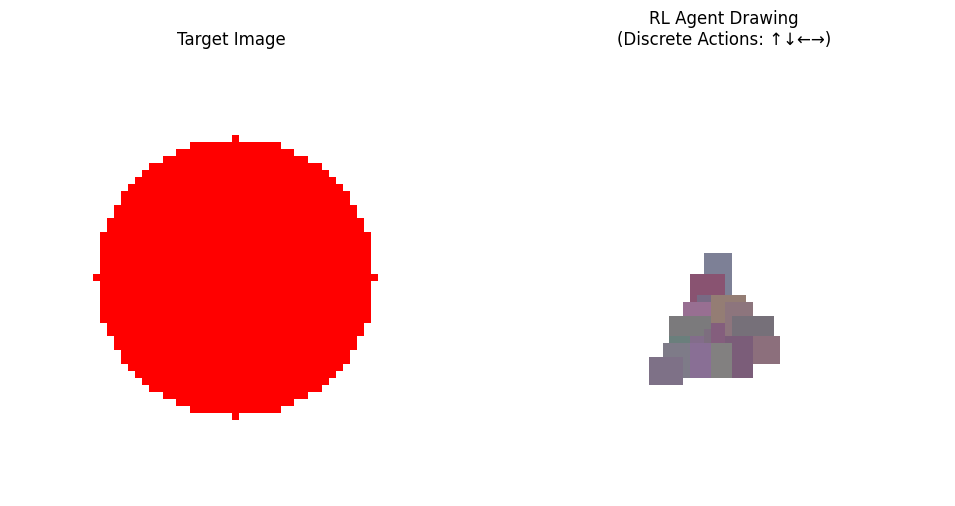

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch.nn.functional as F

# Drawing Environment with Discrete Actions
class DrawingEnv:
    def __init__(self, canvas_size=64, max_strokes=30):
        self.canvas_size = canvas_size
        self.max_strokes = max_strokes
        self.actions = ['up', 'down', 'left', 'right', 'stay']
        self.reset()

    def reset(self):
        """Reset canvas and cursor position"""
        self.canvas = np.ones((self.canvas_size, self.canvas_size, 3), dtype=np.float32)
        # Start cursor in center
        self.cursor_x = self.canvas_size // 2
        self.cursor_y = self.canvas_size // 2
        self.step_count = 0
        self.last_x = self.cursor_x
        self.last_y = self.cursor_y
        return self.get_state()

    def get_state(self):
        """Return current state: canvas + cursor position"""
        state = self.canvas.copy()
        # Mark cursor position with a small dot (for visualization)
        return state

    def draw_stroke(self, x1, y1, x2, y2, color, width):
        """Draw a brush stroke from last position to current"""
        # Ensure coordinates are within bounds
        x1 = np.clip(x1, 0, self.canvas_size - 1)
        y1 = np.clip(y1, 0, self.canvas_size - 1)
        x2 = np.clip(x2, 0, self.canvas_size - 1)
        y2 = np.clip(y2, 0, self.canvas_size - 1)

        width = max(1, int(width))

        # Create PIL image for drawing
        img = Image.fromarray((self.canvas * 255).astype(np.uint8))
        draw = ImageDraw.Draw(img)

        # Draw line from last position to current
        rgb_color = tuple(color)
        draw.line([x1, y1, x2, y2], fill=rgb_color, width=width)

        # Update canvas
        self.canvas = np.array(img).astype(np.float32) / 255.0

    def step(self, action_idx, color, width):
        """
        Execute action
        action_idx: 0=up, 1=down, 2=left, 3=right, 4=stay
        color: [r, g, b] in range [0, 255]
        width: brush width in pixels
        """
        # Store last position
        self.last_x = self.cursor_x
        self.last_y = self.cursor_y

        # Move cursor based on action
        step_size = 3  # How many pixels to move
        if action_idx == 0:  # up
            self.cursor_y -= step_size
        elif action_idx == 1:  # down
            self.cursor_y += step_size
        elif action_idx == 2:  # left
            self.cursor_x -= step_size
        elif action_idx == 3:  # right
            self.cursor_x += step_size
        # action_idx == 4 is 'stay', no movement

        # Keep cursor within bounds
        self.cursor_x = np.clip(self.cursor_x, 0, self.canvas_size - 1)
        self.cursor_y = np.clip(self.cursor_y, 0, self.canvas_size - 1)

        # Draw stroke from last position to current position
        color = np.clip(color, 0, 255).astype(int)
        width = max(1, int(np.clip(width, 1, 10)))

        self.draw_stroke(self.last_x, self.last_y,
                        self.cursor_x, self.cursor_y,
                        color, width)

        self.step_count += 1
        done = self.step_count >= self.max_strokes

        return self.get_state(), done


# Policy Network with Discrete Actions
class StrokePolicy(nn.Module):
    def __init__(self, canvas_size=64, hidden_size=256):
        super().__init__()

        # Encoder: process current canvas
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
        )

        # Calculate flattened size
        flat_size = 128 * (canvas_size // 8) * (canvas_size // 8)

        # Shared features
        self.shared = nn.Sequential(
            nn.Linear(flat_size, hidden_size),
            nn.ReLU(),
        )

        # Movement head: outputs probability distribution over 5 actions
        self.movement_head = nn.Sequential(
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.Linear(64, 5)  # up, down, left, right, stay
        )

        # Color head: outputs RGB values [0, 1]
        self.color_head = nn.Sequential(
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.Linear(64, 3),
            nn.Sigmoid()  # Output in [0, 1], will scale to [0, 255]
        )

        # Width head: outputs brush width [0, 1]
        self.width_head = nn.Sequential(
            nn.Linear(hidden_size, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()  # Output in [0, 1]
        )

    def forward(self, canvas):
        # canvas: (batch, H, W, 3) -> (batch, 3, H, W)
        if len(canvas.shape) == 3:
            canvas = canvas.unsqueeze(0)
        canvas = canvas.permute(0, 3, 1, 2)

        features = self.encoder(canvas)
        shared = self.shared(features)

        # Get action logits (for sampling)
        movement_logits = self.movement_head(shared)

        # Get color and width
        color = self.color_head(shared) * 255  # Scale to [0, 255]
        width = self.width_head(shared) * 9 + 1  # Scale to [1, 10]

        return movement_logits, color, width


# RL Training
class RLDrawer:
    def __init__(self, target_image, canvas_size=64, max_strokes=30):
        self.env = DrawingEnv(canvas_size, max_strokes)
        self.policy = StrokePolicy(canvas_size)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=3e-4)

        # Prepare target image
        if isinstance(target_image, np.ndarray):
            self.target = target_image
        else:
            self.target = np.array(target_image.resize((canvas_size, canvas_size))).astype(np.float32) / 255.0

    def compute_reward(self, canvas):
        """Compute how similar canvas is to target"""
        mse = np.mean((canvas - self.target) ** 2)
        return -mse  # Higher is better

    def train_episode(self):
        """Run one episode and update policy"""
        state = self.env.reset()

        log_probs = []
        rewards = []
        entropy_bonus = []

        done = False
        while not done:
            # Get action from policy
            state_tensor = torch.FloatTensor(state)
            movement_logits, color, width = self.policy(state_tensor)

            # Sample movement action from categorical distribution
            movement_probs = F.softmax(movement_logits, dim=-1)
            movement_dist = torch.distributions.Categorical(movement_probs)
            action_idx = movement_dist.sample()

            # Get values
            color_val = color.detach().numpy()[0]
            width_val = width.detach().numpy()[0, 0]

            # Add exploration noise to color and width
            color_val = np.clip(color_val + np.random.normal(0, 10, 3), 0, 255)
            width_val = np.clip(width_val + np.random.normal(0, 1), 1, 10)

            # Take action
            next_state, done = self.env.step(action_idx.item(), color_val, width_val)

            # Compute reward
            reward = self.compute_reward(next_state)
            rewards.append(reward)

            # Store log probability
            log_prob = movement_dist.log_prob(action_idx)
            log_probs.append(log_prob)

            # Entropy for exploration
            entropy = movement_dist.entropy()
            entropy_bonus.append(entropy)

            state = next_state

        # Compute returns (cumulative rewards)
        returns = []
        G = 0
        for r in reversed(rewards):
            G = r + 0.99 * G  # discount factor
            returns.insert(0, G)

        returns = torch.FloatTensor(returns)
        returns = (returns - returns.mean()) / (returns.std() + 1e-8)

        # Policy gradient loss with entropy bonus
        policy_loss = []
        for log_prob, G, ent in zip(log_probs, returns, entropy_bonus):
            policy_loss.append(-log_prob * G - 0.01 * ent)  # entropy encourages exploration

        policy_loss = torch.stack(policy_loss).sum()

        self.optimizer.zero_grad()
        policy_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.policy.parameters(), 1.0)
        self.optimizer.step()

        return rewards[-1], self.env.canvas

    def train(self, episodes=100):
        """Train the agent"""
        best_reward = -float('inf')
        best_canvas = None

        print("Training RL Drawing Agent...")
        print("Action Space: UP, DOWN, LEFT, RIGHT, STAY + RGB Color + Brush Width")
        print("-" * 60)

        for episode in range(episodes):
            reward, canvas = self.train_episode()

            if reward > best_reward:
                best_reward = reward
                best_canvas = canvas.copy()

            if episode % 10 == 0:
                print(f"Episode {episode:3d} | Reward: {reward:.4f} | Best: {best_reward:.4f}")

        return best_canvas


# Example usage
if __name__ == "__main__":
    # Create a simple target image (red circle)
    target = np.ones((64, 64, 3), dtype=np.float32)
    y, x = np.ogrid[:64, :64]
    mask = (x - 32)**2 + (y - 32)**2 <= 20**2
    target[mask] = [1.0, 0.0, 0.0]  # Red circle

    # Train agent
    drawer = RLDrawer(target, canvas_size=64, max_strokes=30)
    final_canvas = drawer.train(episodes=200)

    # Visualize results
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(target)
    axes[0].set_title("Target Image")
    axes[0].axis('off')

    axes[1].imshow(final_canvas)
    axes[1].set_title("RL Agent Drawing\n(Discrete Actions: ↑↓←→)")
    axes[1].axis('off')

    plt.tight_layout()
    plt.savefig('rl_drawing_discrete.png', dpi=150, bbox_inches='tight')
    print("\nTraining complete! Result saved as 'rl_drawing_discrete.png'")
    plt.show()

In [7]:
#@title test 3
%%html
<svg viewBox="0 0 1400 900" xmlns="http://www.w3.org/2000/svg">
  <!-- Background -->
  <defs>
    <linearGradient id="bgGrad" x1="0%" y1="0%" x2="100%" y2="100%">
      <stop offset="0%" style="stop-color:#0f2027;stop-opacity:1" />
      <stop offset="50%" style="stop-color:#203a43;stop-opacity:1" />
      <stop offset="100%" style="stop-color:#2c5364;stop-opacity:1" />
    </linearGradient>

    <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto">
      <polygon points="0 0, 10 3, 0 6" fill="#ecf0f1"/>
    </marker>

    <marker id="arrowGreen" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto">
      <polygon points="0 0, 10 3, 0 6" fill="#2ecc71"/>
    </marker>

    <marker id="arrowOrange" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto">
      <polygon points="0 0, 10 3, 0 6" fill="#e67e22"/>
    </marker>

    <marker id="arrowPurple" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto">
      <polygon points="0 0, 10 3, 0 6" fill="#9b59b6"/>
    </marker>

    <filter id="glow">
      <feGaussianBlur stdDeviation="3" result="coloredBlur"/>
      <feMerge>
        <feMergeNode in="coloredBlur"/>
        <feMergeNode in="SourceGraphic"/>
      </feMerge>
    </filter>
  </defs>

  <rect width="1400" height="900" fill="url(#bgGrad)"/>

  <!-- Title -->
  <text x="700" y="50" font-family="Arial, sans-serif" font-size="32" font-weight="bold" text-anchor="middle" fill="#ecf0f1" filter="url(#glow)">
    Actor-Critic (A2C) Drawing Agent
  </text>
  <text x="700" y="78" font-family="Arial, sans-serif" font-size="14" text-anchor="middle" fill="#bdc3c7">
    Step-wise Rewards • Value Baseline • Epsilon-Greedy Exploration
  </text>

  <!-- Main Episode Loop -->
  <rect x="40" y="110" width="1320" height="730" fill="none" stroke="#3498db" stroke-width="3" stroke-dasharray="15,8" rx="20" opacity="0.6"/>
  <text x="700" y="140" font-family="Arial, sans-serif" font-size="16" font-weight="bold" text-anchor="middle" fill="#3498db">
    EPISODE LOOP (300 episodes with decaying ε: 0.3→0.01)
  </text>

  <!-- Environment Section -->
  <g id="environment">
    <rect x="80" y="170" width="260" height="300" fill="rgba(46, 204, 113, 0.15)" stroke="#2ecc71" stroke-width="3" rx="12"/>
    <text x="210" y="200" font-family="Arial, sans-serif" font-size="18" font-weight="bold" text-anchor="middle" fill="#2ecc71">
      Drawing Environment
    </text>

    <!-- Canvas with cursor -->
    <rect x="120" y="220" width="180" height="180" fill="#34495e" stroke="#ecf0f1" stroke-width="2"/>
    <circle cx="210" cy="310" r="4" fill="#e74c3c"/>
    <text x="210" y="330" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#ecf0f1">
      Cursor (x,y)
    </text>

    <text x="210" y="420" font-family="Arial, sans-serif" font-size="12" text-anchor="middle" fill="#ecf0f1">
      Canvas: 64×64×3
    </text>
    <text x="210" y="438" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#bdc3c7">
      Max Strokes: 30
    </text>
    <text x="210" y="456" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#bdc3c7">
      Step: 4 pixels
    </text>
  </g>

  <!-- Actor-Critic Network -->
  <g id="actor-critic">
    <rect x="400" y="170" width="320" height="550" fill="rgba(155, 89, 182, 0.15)" stroke="#9b59b6" stroke-width="3" rx="12"/>
    <text x="560" y="200" font-family="Arial, sans-serif" font-size="18" font-weight="bold" text-anchor="middle" fill="#9b59b6">
      Actor-Critic Network
    </text>

    <!-- Shared Encoder -->
    <rect x="430" y="220" width="260" height="140" fill="rgba(52, 73, 94, 0.8)" stroke="#3498db" stroke-width="2" rx="8"/>
    <text x="560" y="242" font-family="Arial, sans-serif" font-size="14" font-weight="bold" text-anchor="middle" fill="#3498db">
      Shared CNN Encoder
    </text>
    <text x="560" y="265" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#ecf0f1">
      Conv2d: 3→32 (stride 2)
    </text>
    <text x="560" y="283" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#ecf0f1">
      Conv2d: 32→64 (stride 2)
    </text>
    <text x="560" y="301" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#ecf0f1">
      Conv2d: 64→128 (stride 2)
    </text>
    <text x="560" y="319" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#bdc3c7">
      Flatten → FC(256) + Dropout(0.1)
    </text>
    <text x="560" y="345" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#7f8c8d">
      Shared Features: 256-dim
    </text>

    <!-- Actor Head -->
    <rect x="430" y="375" width="260" height="200" fill="rgba(230, 126, 34, 0.2)" stroke="#e67e22" stroke-width="2" rx="8"/>
    <text x="560" y="397" font-family="Arial, sans-serif" font-size="14" font-weight="bold" text-anchor="middle" fill="#e67e22">
      🎭 ACTOR (Policy)
    </text>

    <rect x="450" y="410" width="220" height="50" fill="rgba(52, 73, 94, 0.6)" stroke="#e67e22" stroke-width="1.5" rx="5"/>
    <text x="560" y="428" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#ecf0f1">
      Movement: FC(128)→FC(5)
    </text>
    <text x="560" y="445" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#bdc3c7">
      [up, down, left, right, skip]
    </text>

    <rect x="450" y="470" width="105" height="40" fill="rgba(52, 73, 94, 0.6)" stroke="#e67e22" stroke-width="1.5" rx="5"/>
    <text x="502" y="488" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#ecf0f1">
      Color: FC(64)
    </text>
    <text x="502" y="503" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#bdc3c7">
      →FC(3) [r,g,b]
    </text>

    <rect x="565" y="470" width="105" height="40" fill="rgba(52, 73, 94, 0.6)" stroke="#e67e22" stroke-width="1.5" rx="5"/>
    <text x="617" y="488" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#ecf0f1">
      Width: FC(32)
    </text>
    <text x="617" y="503" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#bdc3c7">
      →FC(1) [2-8]
    </text>

    <text x="560" y="530" font-family="Arial, sans-serif" font-size="11" font-weight="bold" text-anchor="middle" fill="#e67e22">
      + ε-greedy exploration
    </text>
    <text x="560" y="548" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#bdc3c7">
      Softmax → Categorical sampling
    </text>
    <text x="560" y="565" font-family="Arial, sans-serif" font-size="9" text-anchor="middle" fill="#7f8c8d">
      Entropy bonus: 0.02
    </text>

    <!-- Critic Head -->
    <rect x="430" y="590" width="260" height="110" fill="rgba(52, 152, 219, 0.2)" stroke="#3498db" stroke-width="2" rx="8"/>
    <text x="560" y="612" font-family="Arial, sans-serif" font-size="14" font-weight="bold" text-anchor="middle" fill="#3498db">
      🎯 CRITIC (Value)
    </text>
    <text x="560" y="640" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#ecf0f1">
      FC(128) → ReLU → FC(1)
    </text>
    <text x="560" y="660" font-family="Arial, sans-serif" font-size="11" font-weight="bold" text-anchor="middle" fill="#3498db">
      V(s) = State Value Estimate
    </text>
    <text x="560" y="680" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#bdc3c7">
      Baseline for advantage
    </text>
  </g>

  <!-- Action Execution -->
  <g id="action">
    <rect x="780" y="170" width="240" height="180" fill="rgba(46, 204, 113, 0.15)" stroke="#2ecc71" stroke-width="3" rx="12"/>
    <text x="900" y="200" font-family="Arial, sans-serif" font-size="18" font-weight="bold" text-anchor="middle" fill="#2ecc71">
      Execute Action
    </text>

    <text x="900" y="230" font-family="Arial, sans-serif" font-size="12" text-anchor="middle" fill="#ecf0f1">
      1. Move Cursor
    </text>
    <text x="900" y="250" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#bdc3c7">
      (up/down/left/right)
    </text>

    <line x1="840" y1="270" x2="960" y2="310" stroke="#e74c3c" stroke-width="4" stroke-linecap="round"/>
    <text x="900" y="290" font-family="Arial, sans-serif" font-size="12" text-anchor="middle" fill="#ecf0f1">
      2. Draw Stroke
    </text>
    <text x="900" y="325" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#bdc3c7">
      from last_pos to cursor
    </text>
    <text x="900" y="342" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#7f8c8d">
      with color &amp; width
    </text>
  </g>

  <!-- Step-wise Reward -->
  <g id="reward">
    <rect x="780" y="370" width="240" height="200" fill="rgba(231, 76, 60, 0.15)" stroke="#e74c3c" stroke-width="3" rx="12"/>
    <text x="900" y="400" font-family="Arial, sans-serif" font-size="18" font-weight="bold" text-anchor="middle" fill="#e74c3c">
      Step-wise Reward
    </text>

    <text x="900" y="430" font-family="Arial, sans-serif" font-size="12" font-weight="bold" text-anchor="middle" fill="#ecf0f1">
      r = (MSE_prev - MSE_curr) × 100
    </text>
    <text x="900" y="455" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#bdc3c7">
      Measures improvement
    </text>
    <text x="900" y="475" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#bdc3c7">
      each step
    </text>

    <text x="900" y="500" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#2ecc71">
      + Bonus: +0.1 if improved
    </text>

    <rect x="810" y="515" width="180" height="40" fill="rgba(52, 73, 94, 0.6)" stroke="#95a5a6" stroke-width="1.5" rx="5"/>
    <text x="900" y="535" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#ecf0f1">
      Compare with target image
    </text>
    <text x="900" y="550" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#bdc3c7">
      (64×64 red circle)
    </text>
  </g>

  <!-- Advantage Computation -->
  <g id="advantage">
    <rect x="1080" y="170" width="260" height="240" fill="rgba(241, 196, 15, 0.15)" stroke="#f1c40f" stroke-width="3" rx="12"/>
    <text x="1210" y="200" font-family="Arial, sans-serif" font-size="18" font-weight="bold" text-anchor="middle" fill="#f1c40f">
      Advantage Estimation
    </text>

    <text x="1210" y="235" font-family="Arial, sans-serif" font-size="12" font-weight="bold" text-anchor="middle" fill="#ecf0f1">
      1. Compute Returns (G)
    </text>
    <text x="1210" y="255" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#bdc3c7">
      G = r + 0.95 × G_next
    </text>
    <text x="1210" y="273" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#7f8c8d">
      (backward through episode)
    </text>

    <text x="1210" y="300" font-family="Arial, sans-serif" font-size="12" font-weight="bold" text-anchor="middle" fill="#ecf0f1">
      2. Normalize Returns
    </text>
    <text x="1210" y="320" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#bdc3c7">
      G = (G - μ) / σ
    </text>

    <text x="1210" y="350" font-family="Arial, sans-serif" font-size="12" font-weight="bold" text-anchor="middle" fill="#ecf0f1">
      3. Compute Advantage
    </text>
    <text x="1210" y="370" font-family="Arial, sans-serif" font-size="11" font-weight="bold" text-anchor="middle" fill="#f1c40f">
      A = G - V(s)
    </text>
    <text x="1210" y="390" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#bdc3c7">
      How much better than expected
    </text>
  </g>

  <!-- Loss Computation -->
  <g id="loss">
    <rect x="1080" y="430" width="260" height="200" fill="rgba(142, 68, 173, 0.15)" stroke="#8e44ad" stroke-width="3" rx="12"/>
    <text x="1210" y="460" font-family="Arial, sans-serif" font-size="18" font-weight="bold" text-anchor="middle" fill="#8e44ad">
      Loss &amp; Update
    </text>

    <text x="1210" y="490" font-family="Arial, sans-serif" font-size="12" font-weight="bold" text-anchor="middle" fill="#e67e22">
      Actor Loss:
    </text>
    <text x="1210" y="510" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#ecf0f1">
      -log π(a|s) × A - 0.02×H
    </text>
    <text x="1210" y="528" font-family="Arial, sans-serif" font-size="9" text-anchor="middle" fill="#7f8c8d">
      (policy gradient + entropy bonus)
    </text>

    <text x="1210" y="555" font-family="Arial, sans-serif" font-size="12" font-weight="bold" text-anchor="middle" fill="#3498db">
      Critic Loss:
    </text>
    <text x="1210" y="575" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#ecf0f1">
      MSE(V(s), G)
    </text>

    <text x="1210" y="600" font-family="Arial, sans-serif" font-size="11" font-weight="bold" text-anchor="middle" fill="#8e44ad">
      Total = Actor + 0.5×Critic
    </text>
    <text x="1210" y="620" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#bdc3c7">
      Adam optimizer (lr=1e-3)
    </text>
  </g>

  <!-- Storage -->
  <g id="storage">
    <rect x="780" y="590" width="240" height="130" fill="rgba(52, 73, 94, 0.3)" stroke="#95a5a6" stroke-width="2" rx="8"/>
    <text x="900" y="615" font-family="Arial, sans-serif" font-size="14" font-weight="bold" text-anchor="middle" fill="#ecf0f1">
      Store Trajectory
    </text>
    <text x="900" y="640" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#bdc3c7">
      • log_probs[]
    </text>
    <text x="900" y="658" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#bdc3c7">
      • values[]
    </text>
    <text x="900" y="676" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#bdc3c7">
      • rewards[]
    </text>
    <text x="900" y="694" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#bdc3c7">
      • entropies[]
    </text>
  </g>

  <!-- Arrows -->
  <!-- Env to Actor-Critic -->
  <path d="M 340 310 L 400 310" stroke="#ecf0f1" stroke-width="3" fill="none" marker-end="url(#arrow)"/>
  <text x="370" y="300" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#ecf0f1">state</text>

  <!-- Actor-Critic to Action -->
  <path d="M 720 280 L 780 280" stroke="#e67e22" stroke-width="3" fill="none" marker-end="url(#arrowOrange)"/>
  <text x="750" y="270" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#e67e22">action</text>

  <!-- Action to Reward -->
  <path d="M 900 350 L 900 370" stroke="#2ecc71" stroke-width="3" fill="none" marker-end="url(#arrowGreen)"/>

  <!-- Reward to Storage -->
  <path d="M 900 570 L 900 590" stroke="#ecf0f1" stroke-width="3" fill="none" marker-end="url(#arrow)"/>

  <!-- Storage to Advantage -->
  <path d="M 1020 650 L 1080 300" stroke="#f1c40f" stroke-width="3" fill="none" marker-end="url(#arrow)" stroke-dasharray="5,5"/>
  <text x="1050" y="475" font-family="Arial, sans-serif" font-size="10" text-anchor="middle" fill="#f1c40f">trajectory</text>

  <!-- Advantage to Loss -->
  <path d="M 1210 410 L 1210 430" stroke="#8e44ad" stroke-width="3" fill="none" marker-end="url(#arrowPurple)"/>

  <!-- Loss back to Network -->
  <path d="M 1080 530 L 720 530" stroke="#9b59b6" stroke-width="3" fill="none" marker-end="url(#arrow)" stroke-dasharray="5,5"/>
  <text x="900" y="520" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#9b59b6">backprop + update</text>

  <!-- Loop back -->
  <path d="M 80 310 L 60 310 L 60 760 L 1340 760 L 1340 280 L 1020 280" stroke="#3498db" stroke-width="3" fill="none" marker-end="url(#arrow)" stroke-dasharray="10,5" opacity="0.7"/>
  <text x="700" y="788" font-family="Arial, sans-serif" font-size="12" font-weight="bold" text-anchor="middle" fill="#3498db">
    NEXT EPISODE (done when step_count ≥ 30)
  </text>

  <!-- Best tracking note -->
  <rect x="400" y="760" width="520" height="60" fill="rgba(26, 188, 156, 0.2)" stroke="#1abc9c" stroke-width="2" rx="8"/>
  <text x="660" y="785" font-family="Arial, sans-serif" font-size="13" font-weight="bold" text-anchor="middle" fill="#1abc9c">
    Track Best Canvas: if MSE &lt; best_MSE → save canvas
  </text>
  <text x="660" y="805" font-family="Arial, sans-serif" font-size="11" text-anchor="middle" fill="#ecf0f1">
    Print progress every 20 episodes • Monitor improvement vs baseline
  </text>
</svg>

Training Improved RL Drawing Agent (Actor-Critic)
Features: Step-wise rewards, Value baseline, Adaptive learning
----------------------------------------------------------------------
Ep   0 | Reward:    4.36 | MSE: 0.1912 | Improvement: 6.5% | ε: 0.300
Ep  20 | Reward:    2.64 | MSE: 0.1987 | Improvement: 2.9% | ε: 0.280
Ep  40 | Reward:    5.95 | MSE: 0.1858 | Improvement: 9.2% | ε: 0.260
Ep  60 | Reward:    3.50 | MSE: 0.1953 | Improvement: 4.5% | ε: 0.240
Ep  80 | Reward:    9.11 | MSE: 0.1740 | Improvement: 14.9% | ε: 0.220
Ep 100 | Reward:    3.72 | MSE: 0.1950 | Improvement: 4.7% | ε: 0.200
Ep 120 | Reward:    5.47 | MSE: 0.1888 | Improvement: 7.7% | ε: 0.180
Ep 140 | Reward:    4.95 | MSE: 0.1918 | Improvement: 6.2% | ε: 0.160
Ep 160 | Reward:    7.67 | MSE: 0.1797 | Improvement: 12.2% | ε: 0.140
Ep 180 | Reward:    6.27 | MSE: 0.1857 | Improvement: 9.2% | ε: 0.120
Ep 200 | Reward:    7.55 | MSE: 0.1803 | Improvement: 11.9% | ε: 0.100
Ep 220 | Reward:    7.30 | MSE: 0.1798 | Im

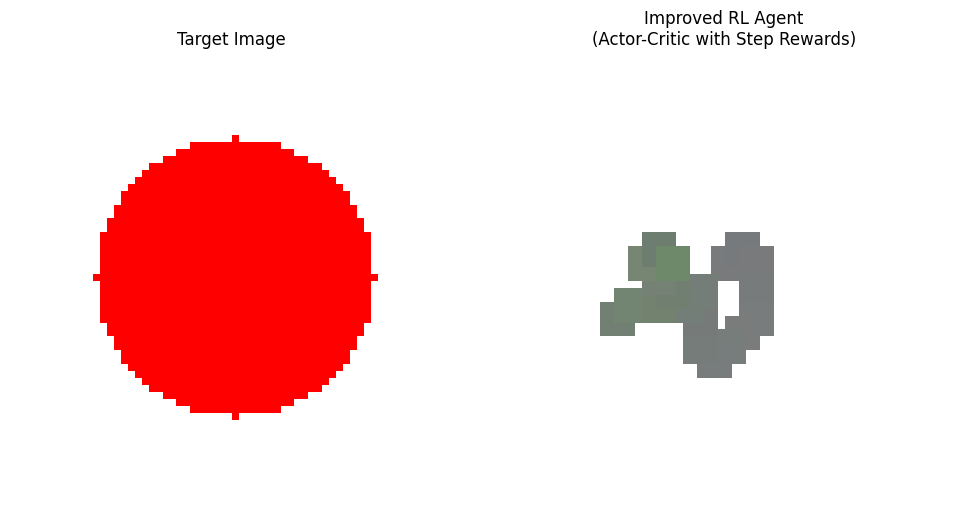

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch.nn.functional as F

# Drawing Environment with Step-wise Rewards
class DrawingEnv:
    def __init__(self, canvas_size=64, max_strokes=30):
        self.canvas_size = canvas_size
        self.max_strokes = max_strokes
        self.reset()

    def reset(self):
        """Reset canvas and cursor position"""
        self.canvas = np.ones((self.canvas_size, self.canvas_size, 3), dtype=np.float32)
        self.cursor_x = self.canvas_size // 2
        self.cursor_y = self.canvas_size // 2
        self.step_count = 0
        self.last_x = self.cursor_x
        self.last_y = self.cursor_y
        return self.get_state()

    def get_state(self):
        """Return current canvas"""
        return self.canvas.copy()

    def draw_stroke(self, x1, y1, x2, y2, color, width):
        """Draw a brush stroke"""
        x1 = np.clip(x1, 0, self.canvas_size - 1)
        y1 = np.clip(y1, 0, self.canvas_size - 1)
        x2 = np.clip(x2, 0, self.canvas_size - 1)
        y2 = np.clip(y2, 0, self.canvas_size - 1)

        width = max(2, int(width))

        img = Image.fromarray((self.canvas * 255).astype(np.uint8))
        draw = ImageDraw.Draw(img)
        rgb_color = tuple(color)
        draw.line([x1, y1, x2, y2], fill=rgb_color, width=width)

        self.canvas = np.array(img).astype(np.float32) / 255.0

    def step(self, action_idx, color, width):
        """Execute action with immediate reward feedback"""
        self.last_x = self.cursor_x
        self.last_y = self.cursor_y

        # Move cursor
        step_size = 4
        if action_idx == 0:  # up
            self.cursor_y -= step_size
        elif action_idx == 1:  # down
            self.cursor_y += step_size
        elif action_idx == 2:  # left
            self.cursor_x -= step_size
        elif action_idx == 3:  # right
            self.cursor_x += step_size

        self.cursor_x = np.clip(self.cursor_x, 0, self.canvas_size - 1)
        self.cursor_y = np.clip(self.cursor_y, 0, self.canvas_size - 1)

        # Draw stroke
        color = np.clip(color, 0, 255).astype(int)
        width = max(2, int(np.clip(width, 2, 8)))

        self.draw_stroke(self.last_x, self.last_y,
                        self.cursor_x, self.cursor_y,
                        color, width)

        self.step_count += 1
        done = self.step_count >= self.max_strokes

        return self.get_state(), done


# Improved Policy Network with Actor-Critic
class ActorCritic(nn.Module):
    def __init__(self, canvas_size=64, hidden_size=256):
        super().__init__()

        # Shared encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
        )

        flat_size = 128 * (canvas_size // 8) * (canvas_size // 8)

        self.shared = nn.Sequential(
            nn.Linear(flat_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.1),
        )

        # Actor: outputs action probabilities
        self.actor_movement = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Linear(128, 5)
        )

        self.actor_color = nn.Sequential(
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.Linear(64, 3),
            nn.Sigmoid()
        )

        self.actor_width = nn.Sequential(
            nn.Linear(hidden_size, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

        # Critic: outputs state value
        self.critic = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, canvas):
        if len(canvas.shape) == 3:
            canvas = canvas.unsqueeze(0)
        canvas = canvas.permute(0, 3, 1, 2)

        features = self.encoder(canvas)
        shared = self.shared(features)

        # Actor outputs
        movement_logits = self.actor_movement(shared)
        color = self.actor_color(shared) * 255
        width = self.actor_width(shared) * 6 + 2

        # Critic output
        value = self.critic(shared)

        return movement_logits, color, width, value


# Improved RL Trainer with Actor-Critic (A2C)
class ImprovedRLDrawer:
    def __init__(self, target_image, canvas_size=64, max_strokes=30):
        self.env = DrawingEnv(canvas_size, max_strokes)
        self.model = ActorCritic(canvas_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=1e-3)

        # Prepare target
        if isinstance(target_image, np.ndarray):
            self.target = target_image
        else:
            self.target = np.array(target_image.resize((canvas_size, canvas_size))).astype(np.float32) / 255.0

        self.baseline_mse = np.mean((np.ones_like(self.target) - self.target) ** 2)

    def compute_reward(self, prev_canvas, curr_canvas):
        """Compute step-wise reward based on improvement"""
        prev_mse = np.mean((prev_canvas - self.target) ** 2)
        curr_mse = np.mean((curr_canvas - self.target) ** 2)

        # Reward is the improvement (reduction in MSE)
        improvement = prev_mse - curr_mse

        # Scale reward to be more significant
        reward = improvement * 100

        # Add bonus for getting closer to target
        if curr_mse < prev_mse:
            reward += 0.1

        return reward, curr_mse

    def train_episode(self, epsilon=0.1):
        """Run episode with Actor-Critic"""
        state = self.env.reset()
        prev_state = state.copy()

        log_probs = []
        values = []
        rewards = []
        entropies = []

        done = False
        episode_reward = 0

        while not done:
            state_tensor = torch.FloatTensor(state)

            # Get policy and value
            movement_logits, color, width, value = self.model(state_tensor)

            # Movement action
            movement_probs = F.softmax(movement_logits, dim=-1)
            movement_dist = torch.distributions.Categorical(movement_probs)

            # Epsilon-greedy exploration
            if np.random.random() < epsilon:
                action_idx = torch.tensor(np.random.randint(0, 5))
            else:
                action_idx = movement_dist.sample()

            # Get color and width (deterministic for now)
            color_val = color.detach().numpy()[0]
            width_val = width.detach().numpy()[0, 0]

            # Take action
            next_state, done = self.env.step(action_idx.item(), color_val, width_val)

            # Compute step-wise reward
            reward, mse = self.compute_reward(prev_state, next_state)

            # Store trajectory
            log_prob = movement_dist.log_prob(action_idx)
            log_probs.append(log_prob)
            values.append(value)
            rewards.append(reward)
            entropies.append(movement_dist.entropy())

            episode_reward += reward
            prev_state = state.copy()
            state = next_state

        # Compute advantages using TD error
        returns = []
        advantages = []
        G = 0

        for i in reversed(range(len(rewards))):
            G = rewards[i] + 0.95 * G
            returns.insert(0, G)

        returns = torch.FloatTensor(returns)
        values = torch.cat(values)

        # Normalize returns
        returns = (returns - returns.mean()) / (returns.std() + 1e-8)

        # Advantages = returns - baseline (value estimates)
        advantages = returns - values.squeeze().detach()

        # Actor loss (policy gradient with advantage)
        actor_loss = []
        for log_prob, adv, ent in zip(log_probs, advantages, entropies):
            actor_loss.append(-log_prob * adv - 0.02 * ent)

        actor_loss = torch.stack(actor_loss).mean()

        # Critic loss (TD error)
        critic_loss = F.mse_loss(values.squeeze(), returns)

        # Total loss
        loss = actor_loss + 0.5 * critic_loss

        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.model.parameters(), 0.5)
        self.optimizer.step()

        return episode_reward, mse, self.env.canvas

    def train(self, episodes=300):
        """Train with decaying exploration"""
        best_mse = float('inf')
        best_canvas = None

        print("Training Improved RL Drawing Agent (Actor-Critic)")
        print("Features: Step-wise rewards, Value baseline, Adaptive learning")
        print("-" * 70)

        for episode in range(episodes):
            # Decay exploration
            epsilon = max(0.01, 0.3 * (1 - episode / episodes))

            reward, mse, canvas = self.train_episode(epsilon)

            if mse < best_mse:
                best_mse = mse
                best_canvas = canvas.copy()

            if episode % 20 == 0:
                improvement = (1 - mse / self.baseline_mse) * 100
                print(f"Ep {episode:3d} | Reward: {reward:7.2f} | MSE: {mse:.4f} | "
                      f"Improvement: {improvement:.1f}% | ε: {epsilon:.3f}")

        return best_canvas


# Main execution
if __name__ == "__main__":
    # Create target (red circle)
    target = np.ones((64, 64, 3), dtype=np.float32)
    y, x = np.ogrid[:64, :64]
    mask = (x - 32)**2 + (y - 32)**2 <= 20**2
    target[mask] = [1.0, 0.0, 0.0]

    # Train
    drawer = ImprovedRLDrawer(target, canvas_size=64, max_strokes=30)
    final_canvas = drawer.train(episodes=300)

    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(target)
    axes[0].set_title("Target Image")
    axes[0].axis('off')

    axes[1].imshow(final_canvas)
    axes[1].set_title("Improved RL Agent\n(Actor-Critic with Step Rewards)")
    axes[1].axis('off')

    plt.tight_layout()
    plt.savefig('improved_rl_drawing.png', dpi=150, bbox_inches='tight')
    print("\nTraining complete! Saved as 'improved_rl_drawing.png'")
    plt.show()


Training Neural Painter with Supervised Learning
Epoch   0 | Loss: 0.084229 | Training samples: 650
Epoch   5 | Loss: 0.076430 | Training samples: 647
Epoch  10 | Loss: 0.080175 | Training samples: 621
Epoch  15 | Loss: 0.075290 | Training samples: 625
Epoch  20 | Loss: 0.075371 | Training samples: 619
Epoch  25 | Loss: 0.077168 | Training samples: 621
Epoch  30 | Loss: 0.073036 | Training samples: 605
Epoch  35 | Loss: 0.077511 | Training samples: 613

Painting target image...
  Stroke  5/25 | MSE: 0.2034
  Stroke 10/25 | MSE: 0.2034
  Stroke 15/25 | MSE: 0.2034
  Stroke 20/25 | MSE: 0.2034
  Stroke 25/25 | MSE: 0.2034

✓ Training complete! Final MSE: 0.2034
  Result saved as 'neural_painter.png'


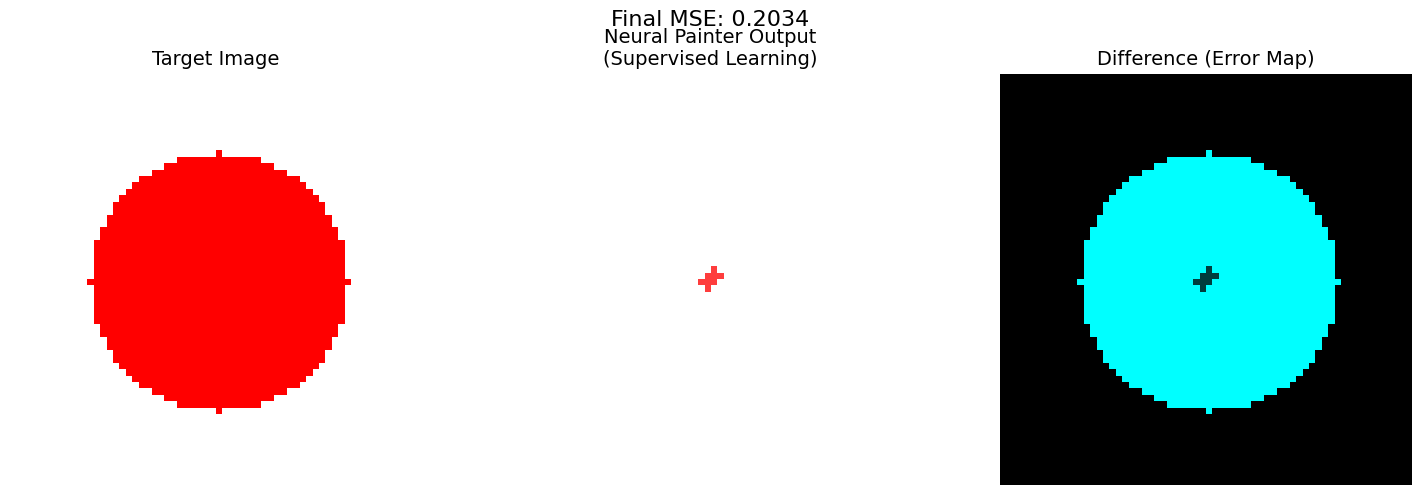

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch.nn.functional as F

class DrawingEnv:
    """Simple drawing environment"""
    def __init__(self, canvas_size=64):
        self.canvas_size = canvas_size
        self.reset()

    def reset(self):
        self.canvas = np.ones((self.canvas_size, self.canvas_size, 3), dtype=np.float32)
        return self.canvas.copy()

    def draw_stroke(self, x1, y1, x2, y2, color, width):
        """Draw a stroke on the canvas"""
        x1, y1 = int(np.clip(x1, 0, self.canvas_size-1)), int(np.clip(y1, 0, self.canvas_size-1))
        x2, y2 = int(np.clip(x2, 0, self.canvas_size-1)), int(np.clip(y2, 0, self.canvas_size-1))
        width = max(2, int(width))

        img = Image.fromarray((self.canvas * 255).astype(np.uint8))
        draw = ImageDraw.Draw(img)
        color = tuple(np.clip(color, 0, 255).astype(int))
        draw.line([x1, y1, x2, y2], fill=color, width=width)

        self.canvas = np.array(img).astype(np.float32) / 255.0
        return self.canvas.copy()


class StrokePredictionNetwork(nn.Module):
    """Predicts the next stroke to paint given current canvas and target"""
    def __init__(self, canvas_size=64):
        super().__init__()

        # Encoder for current canvas + target (6 channels)
        self.encoder = nn.Sequential(
            nn.Conv2d(6, 32, 4, stride=2, padding=1),  # 32x32
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 16x16
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),  # 8x8
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, stride=2, padding=1),  # 4x4
            nn.ReLU(),
            nn.Flatten()
        )

        feature_size = 256 * 4 * 4

        # Stroke parameter predictor
        self.stroke_head = nn.Sequential(
            nn.Linear(feature_size, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)  # [x1, y1, x2, y2, r, g, b, width, pressure, opacity]
        )

    def forward(self, canvas, target):
        """Predict next stroke parameters"""
        # Concatenate canvas and target
        x = torch.cat([canvas, target], dim=1)
        features = self.encoder(x)
        stroke_params = self.stroke_head(features)

        # Parse outputs
        coords = torch.sigmoid(stroke_params[:, :4])  # [0, 1] normalized coordinates
        color = torch.sigmoid(stroke_params[:, 4:7])  # [0, 1] RGB
        width = torch.sigmoid(stroke_params[:, 7:8]) * 6 + 2  # [2, 8]

        return coords, color, width


class NeuralPainter:
    """Progressive painting with supervised learning"""
    def __init__(self, target_image, canvas_size=64, max_strokes=25):
        self.canvas_size = canvas_size
        self.max_strokes = max_strokes
        self.env = DrawingEnv(canvas_size)
        self.model = StrokePredictionNetwork(canvas_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=3e-4)

        # Prepare target
        if isinstance(target_image, np.ndarray):
            self.target = target_image
        else:
            self.target = np.array(target_image.resize((canvas_size, canvas_size))).astype(np.float32) / 255.0

    def generate_training_data(self, num_samples=100):
        """Generate training data by painting randomly and recording good strokes"""
        training_data = []

        for _ in range(num_samples):
            self.env.reset()
            canvas = self.env.canvas.copy()

            for _ in range(self.max_strokes):
                # Random stroke parameters
                x1 = np.random.randint(0, self.canvas_size)
                y1 = np.random.randint(0, self.canvas_size)

                # Bias towards strokes that go towards target areas
                angle = np.random.uniform(0, 2*np.pi)
                length = np.random.uniform(3, 12)
                x2 = int(x1 + length * np.cos(angle))
                y2 = int(y1 + length * np.sin(angle))

                # Sample color from target near this location
                sample_x = np.clip(int((x1 + x2) / 2), 0, self.canvas_size-1)
                sample_y = np.clip(int((y1 + y2) / 2), 0, self.canvas_size-1)
                color = self.target[sample_y, sample_x] * 255
                color += np.random.normal(0, 10, 3)  # Add noise

                width = np.random.uniform(2, 6)

                # Draw stroke
                new_canvas = self.env.draw_stroke(x1, y1, x2, y2, color, width)

                # If this stroke improved the canvas, save it
                old_mse = np.mean((canvas - self.target) ** 2)
                new_mse = np.mean((new_canvas - self.target) ** 2)

                if new_mse < old_mse:
                    # Store: (canvas_before, target, stroke_params)
                    stroke_params = np.array([
                        x1/self.canvas_size, y1/self.canvas_size,
                        x2/self.canvas_size, y2/self.canvas_size,
                        color[0]/255, color[1]/255, color[2]/255,
                        (width-2)/6
                    ])
                    training_data.append((canvas.copy(), self.target.copy(), stroke_params))

                canvas = new_canvas

        return training_data

    def train_supervised(self, epochs=30, samples_per_epoch=50):
        """Train the model with supervised learning"""
        print("Training Neural Painter with Supervised Learning")
        print("=" * 60)

        for epoch in range(epochs):
            # Generate fresh training data
            training_data = self.generate_training_data(samples_per_epoch)

            if len(training_data) == 0:
                continue

            total_loss = 0
            for canvas, target, stroke_params in training_data:
                canvas_t = torch.FloatTensor(canvas).permute(2, 0, 1).unsqueeze(0)
                target_t = torch.FloatTensor(target).permute(2, 0, 1).unsqueeze(0)
                params_t = torch.FloatTensor(stroke_params).unsqueeze(0)

                # Predict stroke
                pred_coords, pred_color, pred_width = self.model(canvas_t, target_t)
                pred_params = torch.cat([
                    pred_coords,
                    pred_color,
                    (pred_width - 2) / 6
                ], dim=1)

                # Loss: MSE between predicted and actual good strokes
                loss = F.mse_loss(pred_params, params_t[:, :8])

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                total_loss += loss.item()

            avg_loss = total_loss / len(training_data)

            if epoch % 5 == 0:
                print(f"Epoch {epoch:3d} | Loss: {avg_loss:.6f} | Training samples: {len(training_data)}")

    def paint(self):
        """Use the trained model to paint the target"""
        self.model.eval()
        self.env.reset()

        print("\nPainting target image...")

        with torch.no_grad():
            for stroke in range(self.max_strokes):
                canvas = self.env.canvas
                canvas_t = torch.FloatTensor(canvas).permute(2, 0, 1).unsqueeze(0)
                target_t = torch.FloatTensor(self.target).permute(2, 0, 1).unsqueeze(0)

                # Predict next stroke
                coords, color, width = self.model(canvas_t, target_t)

                coords = coords[0].numpy()
                color = color[0].numpy() * 255
                width = width[0].item()

                # Convert normalized coords to pixels
                x1 = int(coords[0] * self.canvas_size)
                y1 = int(coords[1] * self.canvas_size)
                x2 = int(coords[2] * self.canvas_size)
                y2 = int(coords[3] * self.canvas_size)

                self.env.draw_stroke(x1, y1, x2, y2, color, width)

                mse = np.mean((self.env.canvas - self.target) ** 2)
                if (stroke + 1) % 5 == 0:
                    print(f"  Stroke {stroke+1:2d}/25 | MSE: {mse:.4f}")

        return self.env.canvas


# Main execution
if __name__ == "__main__":
    # Create target
    target = np.ones((64, 64, 3), dtype=np.float32)
    y, x = np.ogrid[:64, :64]
    mask = (x - 32)**2 + (y - 32)**2 <= 20**2
    target[mask] = [1.0, 0.0, 0.0]

    # Train and paint
    painter = NeuralPainter(target, canvas_size=64, max_strokes=25)
    painter.train_supervised(epochs=40, samples_per_epoch=60)
    final_canvas = painter.paint()

    # Visualize
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(target)
    axes[0].set_title("Target Image", fontsize=14)
    axes[0].axis('off')

    axes[1].imshow(final_canvas)
    axes[1].set_title("Neural Painter Output\n(Supervised Learning)", fontsize=14)
    axes[1].axis('off')

    # Show difference
    diff = np.abs(target - final_canvas)
    axes[2].imshow(diff)
    axes[2].set_title("Difference (Error Map)", fontsize=14)
    axes[2].axis('off')

    final_mse = np.mean((final_canvas - target) ** 2)
    plt.suptitle(f"Final MSE: {final_mse:.4f}", fontsize=16, y=0.98)

    plt.tight_layout()
    plt.savefig('neural_painter.png', dpi=150, bbox_inches='tight')
    print(f"\n✓ Training complete! Final MSE: {final_mse:.4f}")
    print("  Result saved as 'neural_painter.png'")
    plt.show()

Training Pure RL Painter (Continuous Movement)
Action Space: Δx, Δy (continuous), Draw (binary), Stop (binary)
Ep   0 | Reward:   -2.01 | MSE: 0.2046 | Steps:   1 | Best MSE: 0.2046
Ep  25 | Reward:    0.38 | MSE: 0.2021 | Steps:   3 | Best MSE: 0.1922
Ep  50 | Reward:  -17.05 | MSE: 0.2140 | Steps:  33 | Best MSE: 0.1714
Ep  75 | Reward:   -5.06 | MSE: 0.2069 | Steps:  12 | Best MSE: 0.1714
Ep 100 | Reward:    6.45 | MSE: 0.1961 | Steps:   1 | Best MSE: 0.1714
Ep 125 | Reward:    7.25 | MSE: 0.1953 | Steps:   2 | Best MSE: 0.1714
Ep 150 | Reward:  -10.23 | MSE: 0.2119 | Steps:  13 | Best MSE: 0.1714
Ep 175 | Reward:   11.30 | MSE: 0.1911 | Steps:   6 | Best MSE: 0.1714
Ep 200 | Reward:    9.94 | MSE: 0.1925 | Steps:   4 | Best MSE: 0.1714
Ep 225 | Reward:   12.87 | MSE: 0.1896 | Steps:   4 | Best MSE: 0.1714
Ep 250 | Reward:    3.52 | MSE: 0.1991 | Steps:   1 | Best MSE: 0.1714
Ep 275 | Reward:   -9.85 | MSE: 0.2087 | Steps:  27 | Best MSE: 0.1714
Ep 300 | Reward:   -5.22 | MSE: 0.207

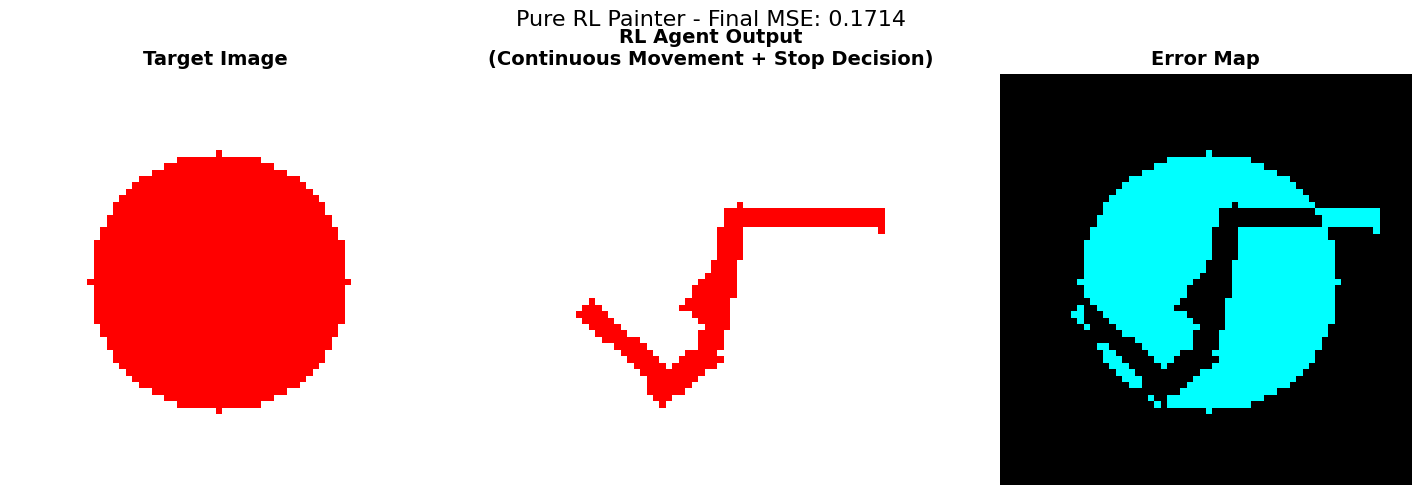

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch.nn.functional as F

class ContinuousDrawingEnv:
    """Drawing environment with continuous movement"""
    def __init__(self, canvas_size=64, target_color=[1.0, 0.0, 0.0]):
        self.canvas_size = canvas_size
        self.target_color = np.array(target_color)
        self.reset()

    def reset(self):
        """Reset canvas and cursor position"""
        self.canvas = np.ones((self.canvas_size, self.canvas_size, 3), dtype=np.float32)
        self.cursor_x = float(self.canvas_size // 2)
        self.cursor_y = float(self.canvas_size // 2)
        self.step_count = 0
        self.trajectory = [(self.cursor_x, self.cursor_y)]
        return self.get_state()

    def get_state(self):
        """Return canvas + cursor position"""
        state = np.zeros((self.canvas_size, self.canvas_size, 5), dtype=np.float32)
        state[:, :, :3] = self.canvas

        cx = int(np.clip(self.cursor_x, 0, self.canvas_size - 1))
        cy = int(np.clip(self.cursor_y, 0, self.canvas_size - 1))

        for dy in range(-2, 3):
            for dx in range(-2, 3):
                nx, ny = cx + dx, cy + dy
                if 0 <= nx < self.canvas_size and 0 <= ny < self.canvas_size:
                    state[ny, nx, 3] = 1.0

        state[:, :, 4] = self.cursor_x / self.canvas_size

        return state

    def draw_stroke(self, x1, y1, x2, y2):
        """Draw a stroke in the target color"""
        x1 = int(np.clip(x1, 0, self.canvas_size - 1))
        y1 = int(np.clip(y1, 0, self.canvas_size - 1))
        x2 = int(np.clip(x2, 0, self.canvas_size - 1))
        y2 = int(np.clip(y2, 0, self.canvas_size - 1))

        img = Image.fromarray((self.canvas * 255).astype(np.uint8))
        draw = ImageDraw.Draw(img)
        color = tuple((self.target_color * 255).astype(int))
        draw.line([x1, y1, x2, y2], fill=color, width=4)

        self.canvas = np.array(img).astype(np.float32) / 255.0

    def step(self, action):
        """Execute action: [dx, dy, draw, stop]"""
        last_x, last_y = self.cursor_x, self.cursor_y

        dx, dy = action[0] * 5, action[1] * 5
        self.cursor_x = np.clip(self.cursor_x + dx, 0, self.canvas_size - 1)
        self.cursor_y = np.clip(self.cursor_y + dy, 0, self.canvas_size - 1)

        self.trajectory.append((self.cursor_x, self.cursor_y))

        if action[2] > 0.5:
            self.draw_stroke(last_x, last_y, self.cursor_x, self.cursor_y)

        self.step_count += 1
        done = action[3] > 0.5 or self.step_count >= 200

        return self.get_state(), done


class ContinuousPolicyNetwork(nn.Module):
    """Policy network for continuous drawing actions"""
    def __init__(self, canvas_size=64):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(5, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
        )

        flat_size = 128 * 8 * 8

        self.shared = nn.Sequential(
            nn.Linear(flat_size, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
        )

        self.movement_mean = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Tanh()
        )

        self.movement_std = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Softplus()
        )

        self.draw_head = nn.Sequential(
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

        self.stop_head = nn.Sequential(
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

        self.value_head = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, state):
        if len(state.shape) == 3:
            state = state.unsqueeze(0)

        state = state.permute(0, 3, 1, 2)

        features = self.encoder(state)
        shared = self.shared(features)

        movement_mean = self.movement_mean(shared)
        movement_std = self.movement_std(shared) + 0.1

        draw_prob = self.draw_head(shared)
        stop_prob = self.stop_head(shared)

        value = self.value_head(shared)

        return movement_mean, movement_std, draw_prob, stop_prob, value


class ContinuousRLDrawer:
    """RL-based painter with continuous actions"""
    def __init__(self, target_image, canvas_size=64):
        self.env = ContinuousDrawingEnv(canvas_size, target_color=[1.0, 0.0, 0.0])
        self.policy = ContinuousPolicyNetwork(canvas_size)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=3e-4)

        if isinstance(target_image, np.ndarray):
            self.target = target_image
        else:
            self.target = np.array(target_image.resize((canvas_size, canvas_size))).astype(np.float32) / 255.0

        self.best_mse = float('inf')
        self.best_canvas = None

    def compute_reward(self, prev_canvas, curr_canvas, done, step_count):
        """Compute reward based on improvement"""
        prev_mse = np.mean((prev_canvas - self.target) ** 2)
        curr_mse = np.mean((curr_canvas - self.target) ** 2)
        improvement = (prev_mse - curr_mse) * 1000

        step_penalty = -0.01 * step_count

        if done and curr_mse < 0.05:
            completion_bonus = 5.0
        elif done and curr_mse > 0.1:
            completion_bonus = -2.0
        else:
            completion_bonus = 0

        reward = improvement + step_penalty + completion_bonus

        return reward, curr_mse

    def train_episode(self):
        """Run one training episode"""
        state = self.env.reset()
        prev_canvas = self.env.canvas.copy()

        states, actions, rewards = [], [], []

        done = False
        episode_reward = 0

        # Collect trajectory
        while not done:
            state_tensor = torch.FloatTensor(state)

            # Sample action WITHOUT gradient tracking (for efficiency)
            with torch.no_grad():
                movement_mean, movement_std, draw_prob, stop_prob, value = self.policy(state_tensor)

                movement_dist = torch.distributions.Normal(movement_mean, movement_std)
                movement = movement_dist.sample()

                draw = torch.bernoulli(draw_prob)
                stop = torch.bernoulli(stop_prob)

                action_tensor = torch.cat([movement[0], draw[0], stop[0]])
                action = action_tensor.numpy()

            # Take step
            next_state, done = self.env.step(action)

            reward, mse = self.compute_reward(prev_canvas, self.env.canvas, done, self.env.step_count)

            states.append(state)
            actions.append(action_tensor)
            rewards.append(reward)

            episode_reward += reward
            prev_canvas = self.env.canvas.copy()
            state = next_state

        # Compute returns
        returns = []
        G = 0
        for r in reversed(rewards):
            G = r + 0.99 * G
            returns.insert(0, G)

        returns = torch.FloatTensor(returns)
        if len(returns) > 1:
            returns = (returns - returns.mean()) / (returns.std() + 1e-8)

        # Now recompute policy outputs WITH gradients for backprop
        policy_loss = 0
        value_loss = 0

        for i, (state, action, ret) in enumerate(zip(states, actions, returns)):
            state_tensor = torch.FloatTensor(state)

            movement_mean, movement_std, draw_prob, stop_prob, value = self.policy(state_tensor)

            # Movement log prob
            movement_dist = torch.distributions.Normal(movement_mean, movement_std)
            movement_log_prob = movement_dist.log_prob(action[:2]).sum()

            # Draw log prob
            draw_dist = torch.distributions.Bernoulli(draw_prob)
            draw_log_prob = draw_dist.log_prob(action[2])

            # Stop log prob
            stop_dist = torch.distributions.Bernoulli(stop_prob)
            stop_log_prob = stop_dist.log_prob(action[3])

            # Total log prob
            total_log_prob = movement_log_prob + draw_log_prob + stop_log_prob

            # Advantage
            advantage = ret - value.squeeze().detach()

            # Policy loss (negative log prob * advantage)
            policy_loss = policy_loss - total_log_prob * advantage

            # Value loss
            value_loss = value_loss + F.mse_loss(value.squeeze(), ret)

        # Average losses
        policy_loss = policy_loss / len(states)
        value_loss = value_loss / len(states)

        # Total loss
        loss = policy_loss + 0.5 * value_loss

        # Optimize
        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.policy.parameters(), 0.5)
        self.optimizer.step()

        # Track best
        final_mse = np.mean((self.env.canvas - self.target) ** 2)
        if final_mse < self.best_mse:
            self.best_mse = final_mse
            self.best_canvas = self.env.canvas.copy()

        return episode_reward, final_mse, self.env.step_count, self.env.canvas

    def train(self, episodes=500):
        """Train the agent"""
        print("Training Pure RL Painter (Continuous Movement)")
        print("Action Space: Δx, Δy (continuous), Draw (binary), Stop (binary)")
        print("=" * 70)

        for episode in range(episodes):
            reward, mse, steps, canvas = self.train_episode()

            if episode % 25 == 0:
                improvement = max(0, (1 - mse / 0.2) * 100)
                print(f"Ep {episode:3d} | Reward: {reward:7.2f} | MSE: {mse:.4f} | "
                      f"Steps: {steps:3d} | Best MSE: {self.best_mse:.4f}")

        return self.best_canvas if self.best_canvas is not None else canvas


# Main execution
if __name__ == "__main__":
    # Create target
    target = np.ones((64, 64, 3), dtype=np.float32)
    y, x = np.ogrid[:64, :64]
    mask = (x - 32)**2 + (y - 32)**2 <= 20**2
    target[mask] = [1.0, 0.0, 0.0]

    # Train
    drawer = ContinuousRLDrawer(target, canvas_size=64)
    final_canvas = drawer.train(episodes=500)

    # Visualize
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(target)
    axes[0].set_title("Target Image", fontsize=14, fontweight='bold')
    axes[0].axis('off')

    axes[1].imshow(final_canvas)
    axes[1].set_title("RL Agent Output\n(Continuous Movement + Stop Decision)", fontsize=14, fontweight='bold')
    axes[1].axis('off')

    diff = np.abs(target - final_canvas)
    axes[2].imshow(diff, cmap='hot')
    axes[2].set_title("Error Map", fontsize=14, fontweight='bold')
    axes[2].axis('off')

    final_mse = np.mean((final_canvas - target) ** 2)
    plt.suptitle(f"Pure RL Painter - Final MSE: {final_mse:.4f}", fontsize=16, y=0.98)

    plt.tight_layout()
    plt.savefig('pure_rl_painter.png', dpi=150, bbox_inches='tight')
    print(f"\n{'='*70}")
    print(f"✓ Training Complete!")
    print(f"  Final MSE: {final_mse:.4f}")
    print(f"  Best MSE achieved: {drawer.best_mse:.4f}")
    print(f"  Saved as 'pure_rl_painter.png'")
    plt.show()

Training Improved RL Painter (Continuous Movement)
Improvements: Entropy Bonus, Dense Rewards, Early Stop Prevention
Ep    0 | Reward:   55.66 | MSE: 0.1748 | Steps:  16 | Best: 0.1748 | Explore: 0.500
Ep   50 | Reward:  -23.23 | MSE: 0.2135 | Steps:  16 | Best: 0.1675 | Explore: 0.389
Ep  100 | Reward:   62.91 | MSE: 0.1712 | Steps:  20 | Best: 0.1675 | Explore: 0.303
Ep  150 | Reward:   26.32 | MSE: 0.1893 | Steps:  17 | Best: 0.1675 | Explore: 0.236
Ep  200 | Reward:   -1.16 | MSE: 0.2030 | Steps:  18 | Best: 0.1675 | Explore: 0.183
Ep  250 | Reward:   -3.37 | MSE: 0.2039 | Steps:  16 | Best: 0.1675 | Explore: 0.143
Ep  300 | Reward:   12.88 | MSE: 0.1961 | Steps:  16 | Best: 0.1675 | Explore: 0.111
Ep  350 | Reward:   -8.05 | MSE: 0.2065 | Steps:  17 | Best: 0.1675 | Explore: 0.100
Ep  400 | Reward:  -58.39 | MSE: 0.2318 | Steps:  16 | Best: 0.1675 | Explore: 0.100
Ep  450 | Reward:   -5.68 | MSE: 0.2046 | Steps:  16 | Best: 0.1675 | Explore: 0.100
Ep  500 | Reward:   -5.68 | MSE: 

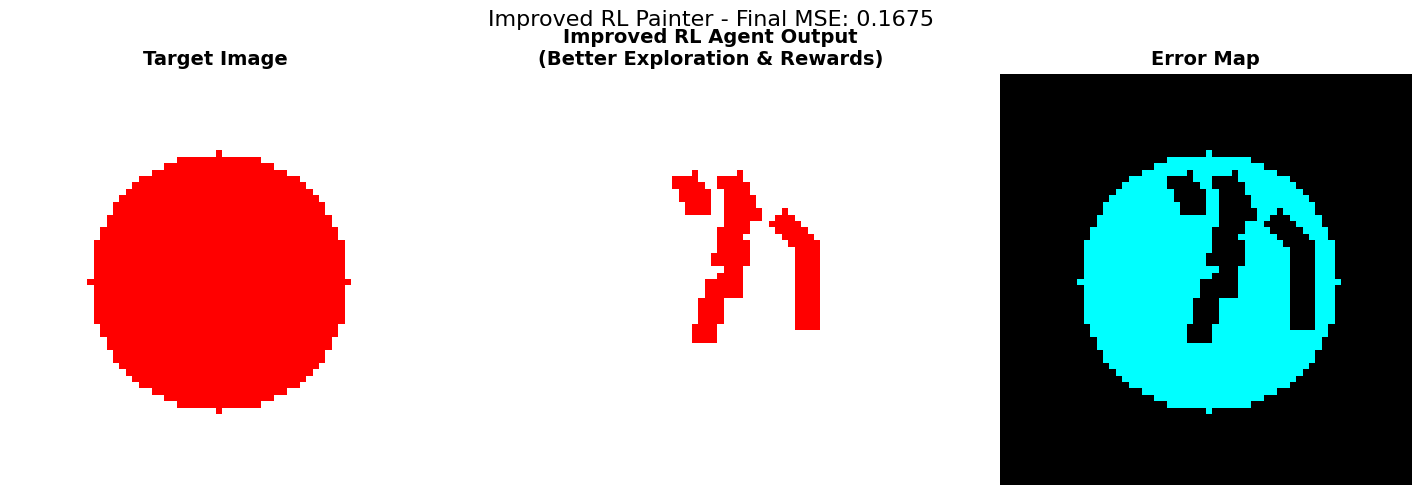

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch.nn.functional as F

class ContinuousDrawingEnv:
    """Drawing environment with continuous movement"""
    def __init__(self, canvas_size=64, target_color=[1.0, 0.0, 0.0]):
        self.canvas_size = canvas_size
        self.target_color = np.array(target_color)
        self.reset()

    def reset(self):
        """Reset canvas and cursor position"""
        self.canvas = np.ones((self.canvas_size, self.canvas_size, 3), dtype=np.float32)
        self.cursor_x = float(self.canvas_size // 2)
        self.cursor_y = float(self.canvas_size // 2)
        self.step_count = 0
        self.trajectory = [(self.cursor_x, self.cursor_y)]
        return self.get_state()

    def get_state(self):
        """Return canvas + cursor position"""
        state = np.zeros((self.canvas_size, self.canvas_size, 5), dtype=np.float32)
        state[:, :, :3] = self.canvas

        cx = int(np.clip(self.cursor_x, 0, self.canvas_size - 1))
        cy = int(np.clip(self.cursor_y, 0, self.canvas_size - 1))

        for dy in range(-2, 3):
            for dx in range(-2, 3):
                nx, ny = cx + dx, cy + dy
                if 0 <= nx < self.canvas_size and 0 <= ny < self.canvas_size:
                    state[ny, nx, 3] = 1.0

        state[:, :, 4] = self.cursor_x / self.canvas_size

        return state

    def draw_stroke(self, x1, y1, x2, y2):
        """Draw a stroke in the target color"""
        x1 = int(np.clip(x1, 0, self.canvas_size - 1))
        y1 = int(np.clip(y1, 0, self.canvas_size - 1))
        x2 = int(np.clip(x2, 0, self.canvas_size - 1))
        y2 = int(np.clip(y2, 0, self.canvas_size - 1))

        img = Image.fromarray((self.canvas * 255).astype(np.uint8))
        draw = ImageDraw.Draw(img)
        color = tuple((self.target_color * 255).astype(int))
        draw.line([x1, y1, x2, y2], fill=color, width=4)

        self.canvas = np.array(img).astype(np.float32) / 255.0

    def step(self, action):
        """Execute action: [dx, dy, draw, stop]"""
        last_x, last_y = self.cursor_x, self.cursor_y

        dx, dy = action[0] * 5, action[1] * 5
        self.cursor_x = np.clip(self.cursor_x + dx, 0, self.canvas_size - 1)
        self.cursor_y = np.clip(self.cursor_y + dy, 0, self.canvas_size - 1)

        self.trajectory.append((self.cursor_x, self.cursor_y))

        if action[2] > 0.5:
            self.draw_stroke(last_x, last_y, self.cursor_x, self.cursor_y)

        self.step_count += 1
        done = action[3] > 0.5 or self.step_count >= 200

        return self.get_state(), done


class ContinuousPolicyNetwork(nn.Module):
    """Policy network with improved architecture"""
    def __init__(self, canvas_size=64):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(5, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Flatten(),
        )

        flat_size = 128 * 8 * 8

        self.shared = nn.Sequential(
            nn.Linear(flat_size, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
        )

        self.movement_mean = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Tanh()
        )

        self.movement_logstd = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )

        self.draw_head = nn.Sequential(
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

        self.stop_head = nn.Sequential(
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

        self.value_head = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, state):
        if len(state.shape) == 3:
            state = state.unsqueeze(0)

        state = state.permute(0, 3, 1, 2)

        features = self.encoder(state)
        shared = self.shared(features)

        movement_mean = self.movement_mean(shared)
        movement_logstd = torch.clamp(self.movement_logstd(shared), -5, 2)
        movement_std = torch.exp(movement_logstd)

        draw_logits = self.draw_head(shared)
        stop_logits = self.stop_head(shared)

        value = self.value_head(shared)

        return movement_mean, movement_std, draw_logits, stop_logits, value


class ContinuousRLDrawer:
    """Improved RL painter with better exploration and reward shaping"""
    def __init__(self, target_image, canvas_size=64):
        self.env = ContinuousDrawingEnv(canvas_size, target_color=[1.0, 0.0, 0.0])
        self.policy = ContinuousPolicyNetwork(canvas_size)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=1e-4)

        if isinstance(target_image, np.ndarray):
            self.target = target_image
        else:
            self.target = np.array(target_image.resize((canvas_size, canvas_size))).astype(np.float32) / 255.0

        self.best_mse = float('inf')
        self.best_canvas = None
        self.episode_count = 0

        # Exploration parameters
        self.min_steps = 15  # Minimum steps before allowing stop
        self.exploration_noise = 0.5  # Initial exploration noise

    def compute_reward(self, prev_canvas, curr_canvas, done, step_count, action):
        """Enhanced reward function with better shaping"""
        prev_mse = np.mean((prev_canvas - self.target) ** 2)
        curr_mse = np.mean((curr_canvas - self.target) ** 2)

        # Main reward: improvement in MSE (scaled up)
        improvement = (prev_mse - curr_mse) * 2000

        # Dense reward: pixel coverage of target color
        target_mask = (self.target[:,:,0] > 0.9) & (self.target[:,:,1] < 0.1)
        canvas_mask = (curr_canvas[:,:,0] > 0.9) & (curr_canvas[:,:,1] < 0.1)
        coverage = np.sum(target_mask & canvas_mask) / (np.sum(target_mask) + 1e-8)
        coverage_reward = coverage * 0.5

        # Penalty for stopping too early
        if done and step_count < self.min_steps:
            early_stop_penalty = -20.0
        else:
            early_stop_penalty = 0

        # Small step penalty to encourage efficiency (but not too much)
        step_penalty = -0.005 * step_count

        # Bonus for good completion
        if done and curr_mse < 0.08:
            completion_bonus = 10.0
        elif done and curr_mse < 0.12:
            completion_bonus = 5.0
        elif done and curr_mse > 0.15:
            completion_bonus = -5.0
        else:
            completion_bonus = 0

        # Reward for drawing (encourage action)
        draw_reward = 0.1 if action[2] > 0.5 else 0

        reward = improvement + coverage_reward + step_penalty + completion_bonus + early_stop_penalty + draw_reward

        return reward, curr_mse

    def train_episode(self):
        """Run one training episode with improved exploration"""
        state = self.env.reset()
        prev_canvas = self.env.canvas.copy()

        states, actions, rewards = [], [], []

        done = False
        episode_reward = 0

        # Decay exploration noise
        exploration_factor = max(0.1, self.exploration_noise * (0.995 ** self.episode_count))

        # Collect trajectory
        while not done:
            state_tensor = torch.FloatTensor(state)

            with torch.no_grad():
                movement_mean, movement_std, draw_logits, stop_logits, value = self.policy(state_tensor)

                # Add exploration noise
                movement_std = movement_std + exploration_factor

                movement_dist = torch.distributions.Normal(movement_mean, movement_std)
                movement = movement_dist.sample()

                # Prevent early stopping
                if self.env.step_count < self.min_steps:
                    stop_logits = stop_logits - 10.0  # Make stopping very unlikely

                draw_prob = torch.sigmoid(draw_logits)
                stop_prob = torch.sigmoid(stop_logits)

                draw = torch.bernoulli(draw_prob)
                stop = torch.bernoulli(stop_prob)

                action_tensor = torch.cat([movement[0], draw[0], stop[0]])
                action = action_tensor.numpy()

            # Take step
            next_state, done = self.env.step(action)

            reward, mse = self.compute_reward(prev_canvas, self.env.canvas, done, self.env.step_count, action)

            states.append(state)
            actions.append(action_tensor)
            rewards.append(reward)

            episode_reward += reward
            prev_canvas = self.env.canvas.copy()
            state = next_state

        # Compute returns with GAE-like advantages
        returns = []
        G = 0
        gamma = 0.99
        for r in reversed(rewards):
            G = r + gamma * G
            returns.insert(0, G)

        returns = torch.FloatTensor(returns)
        if len(returns) > 1:
            returns = (returns - returns.mean()) / (returns.std() + 1e-8)

        # Update policy with entropy bonus
        policy_loss = 0
        value_loss = 0
        entropy = 0

        for i, (state, action, ret) in enumerate(zip(states, actions, returns)):
            state_tensor = torch.FloatTensor(state)

            movement_mean, movement_std, draw_logits, stop_logits, value = self.policy(state_tensor)

            # Movement log prob and entropy
            movement_dist = torch.distributions.Normal(movement_mean, movement_std)
            movement_log_prob = movement_dist.log_prob(action[:2]).sum()
            entropy += movement_dist.entropy().sum()

            # Draw log prob and entropy
            draw_prob = torch.sigmoid(draw_logits).squeeze()
            draw_dist = torch.distributions.Bernoulli(draw_prob)
            draw_log_prob = draw_dist.log_prob(action[2])
            entropy += draw_dist.entropy()

            # Stop log prob and entropy
            stop_prob = torch.sigmoid(stop_logits).squeeze()
            stop_dist = torch.distributions.Bernoulli(stop_prob)
            stop_log_prob = stop_dist.log_prob(action[3])
            entropy += stop_dist.entropy()

            # Total log prob
            total_log_prob = movement_log_prob + draw_log_prob + stop_log_prob

            # Advantage
            advantage = ret - value.squeeze().detach()

            # Policy loss (negative log prob * advantage)
            policy_loss = policy_loss - total_log_prob * advantage

            # Value loss
            value_loss = value_loss + F.mse_loss(value.squeeze(), ret)

        # Average losses
        num_steps = len(states)
        policy_loss = policy_loss / num_steps
        value_loss = value_loss / num_steps
        entropy = entropy / num_steps

        # Total loss with entropy bonus for exploration
        entropy_coef = 0.02
        loss = policy_loss + 0.5 * value_loss - entropy_coef * entropy

        # Optimize
        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.policy.parameters(), 0.5)
        self.optimizer.step()

        # Track best
        final_mse = np.mean((self.env.canvas - self.target) ** 2)
        if final_mse < self.best_mse:
            self.best_mse = final_mse
            self.best_canvas = self.env.canvas.copy()

        self.episode_count += 1

        return episode_reward, final_mse, self.env.step_count, self.env.canvas

    def train(self, episodes=1000):
        """Train the agent with improved hyperparameters"""
        print("Training Improved RL Painter (Continuous Movement)")
        print("Improvements: Entropy Bonus, Dense Rewards, Early Stop Prevention")
        print("=" * 70)

        for episode in range(episodes):
            reward, mse, steps, canvas = self.train_episode()

            if episode % 50 == 0:
                exploration = max(0.1, self.exploration_noise * (0.995 ** episode))
                print(f"Ep {episode:4d} | Reward: {reward:7.2f} | MSE: {mse:.4f} | "
                      f"Steps: {steps:3d} | Best: {self.best_mse:.4f} | Explore: {exploration:.3f}")

        print(f"\n{'='*70}")
        print(f"✓ Training Complete!")
        print(f"  Final MSE: {np.mean((canvas - self.target) ** 2):.4f}")
        print(f"  Best MSE: {self.best_mse:.4f}")

        return self.best_canvas if self.best_canvas is not None else canvas


# Main execution
if __name__ == "__main__":
    # Create target
    target = np.ones((64, 64, 3), dtype=np.float32)
    y, x = np.ogrid[:64, :64]
    mask = (x - 32)**2 + (y - 32)**2 <= 20**2
    target[mask] = [1.0, 0.0, 0.0]

    # Train
    drawer = ContinuousRLDrawer(target, canvas_size=64)
    final_canvas = drawer.train(episodes=1000)

    # Visualize
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(target)
    axes[0].set_title("Target Image", fontsize=14, fontweight='bold')
    axes[0].axis('off')

    axes[1].imshow(final_canvas)
    axes[1].set_title("Improved RL Agent Output\n(Better Exploration & Rewards)", fontsize=14, fontweight='bold')
    axes[1].axis('off')

    diff = np.abs(target - final_canvas)
    axes[2].imshow(diff, cmap='hot')
    axes[2].set_title("Error Map", fontsize=14, fontweight='bold')
    axes[2].axis('off')

    final_mse = np.mean((final_canvas - target) ** 2)
    plt.suptitle(f"Improved RL Painter - Final MSE: {final_mse:.4f}", fontsize=16, y=0.98)

    plt.tight_layout()
    plt.savefig('improved_rl_painter.png', dpi=150, bbox_inches='tight')
    print(f"  Saved as 'improved_rl_painter.png'")
    plt.show()

SPARSE REWARD RL PAINTER
Reward Structure: ONLY at episode end (no intermediate feedback)
Training Episodes: 3000
Action Space: Δx, Δy (continuous), Draw (binary), Stop (binary)
Ep    0 | Reward:  -204.64 | MSE: 0.2046 | Steps:   1 | Best: 0.2046 | Avg100 MSE: 0.2046
Ep  100 | Reward:  -204.64 | MSE: 0.2046 | Steps:   1 | Best: 0.1901 | Avg100 MSE: 0.2004
Ep  200 | Reward:  -204.64 | MSE: 0.2046 | Steps:   1 | Best: 0.1732 | Avg100 MSE: 0.1989
Ep  300 | Reward:  -204.64 | MSE: 0.2046 | Steps:   1 | Best: 0.1732 | Avg100 MSE: 0.2509
Ep  400 | Reward:  -200.25 | MSE: 0.2002 | Steps:   1 | Best: 0.1732 | Avg100 MSE: 0.2019
Ep  500 | Reward:  -204.64 | MSE: 0.2046 | Steps:   1 | Best: 0.1732 | Avg100 MSE: 0.2013
Ep  600 | Reward:  -196.28 | MSE: 0.1961 | Steps:   3 | Best: 0.1732 | Avg100 MSE: 0.2005
Ep  700 | Reward:  -204.64 | MSE: 0.2046 | Steps:   1 | Best: 0.1732 | Avg100 MSE: 0.2033
Ep  800 | Reward:  -204.64 | MSE: 0.2046 | Steps:   1 | Best: 0.1732 | Avg100 MSE: 0.2026
Ep  900 | Re

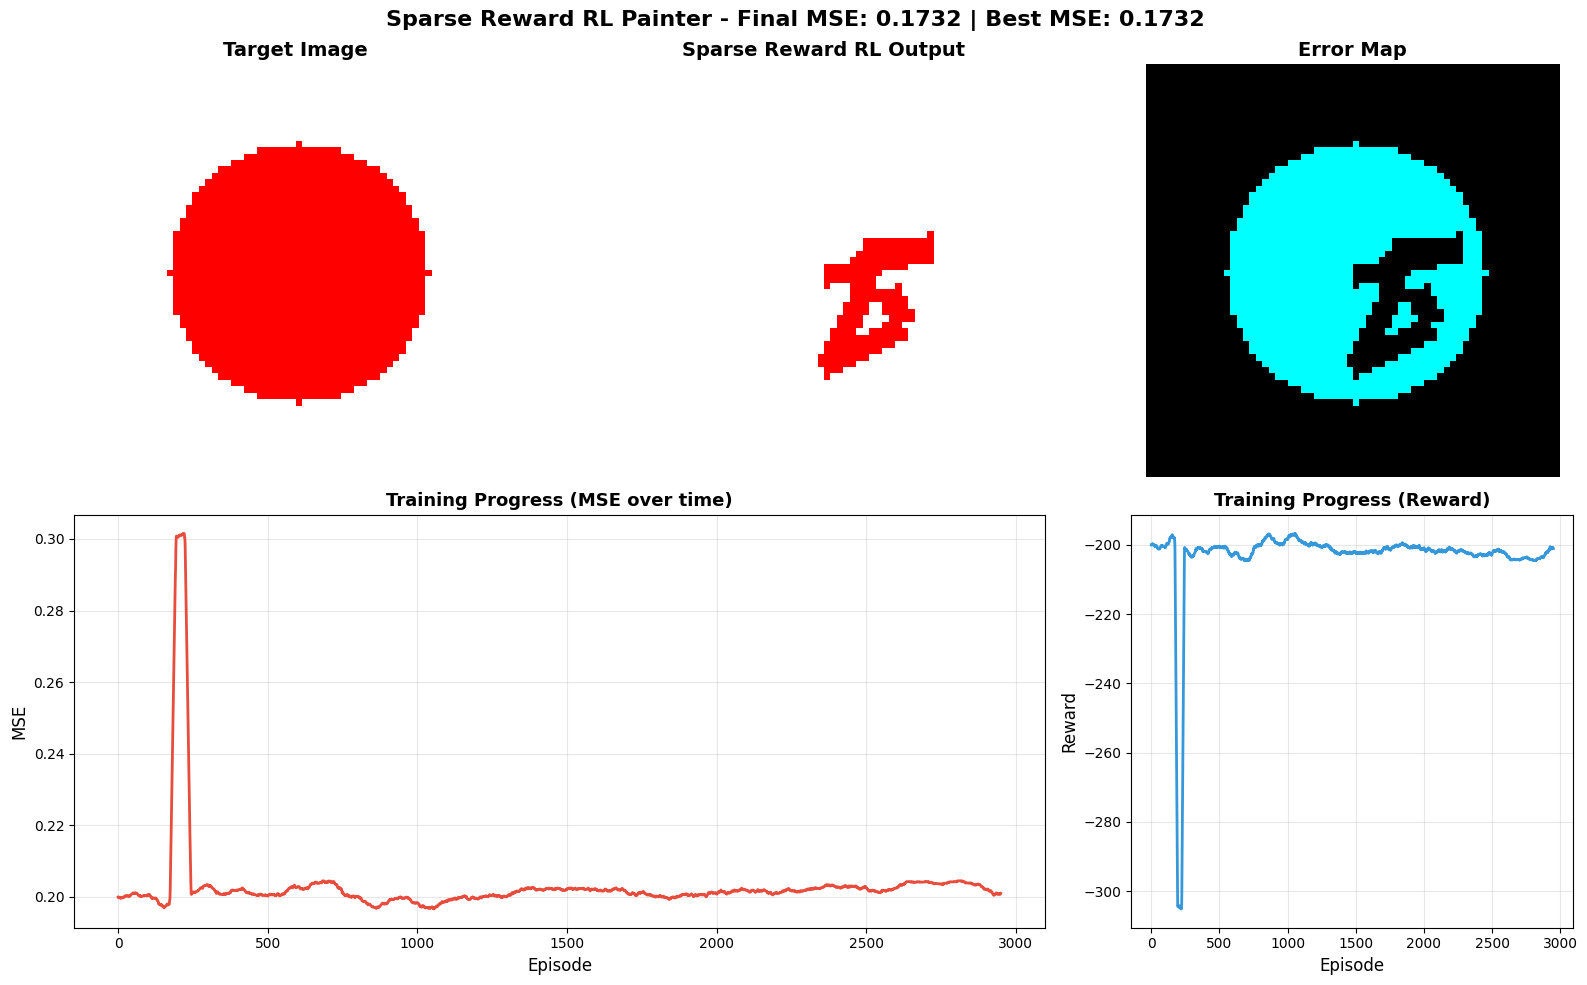

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch.nn.functional as F

class ContinuousDrawingEnv:
    """Drawing environment with continuous movement"""
    def __init__(self, canvas_size=64, target_color=[1.0, 0.0, 0.0]):
        self.canvas_size = canvas_size
        self.target_color = np.array(target_color)
        self.reset()

    def reset(self):
        """Reset canvas and cursor position"""
        self.canvas = np.ones((self.canvas_size, self.canvas_size, 3), dtype=np.float32)
        self.cursor_x = float(self.canvas_size // 2)
        self.cursor_y = float(self.canvas_size // 2)
        self.step_count = 0
        self.trajectory = [(self.cursor_x, self.cursor_y)]
        return self.get_state()

    def get_state(self):
        """Return canvas + cursor position"""
        state = np.zeros((self.canvas_size, self.canvas_size, 5), dtype=np.float32)
        state[:, :, :3] = self.canvas

        cx = int(np.clip(self.cursor_x, 0, self.canvas_size - 1))
        cy = int(np.clip(self.cursor_y, 0, self.canvas_size - 1))

        for dy in range(-2, 3):
            for dx in range(-2, 3):
                nx, ny = cx + dx, cy + dy
                if 0 <= nx < self.canvas_size and 0 <= ny < self.canvas_size:
                    state[ny, nx, 3] = 1.0

        state[:, :, 4] = self.cursor_x / self.canvas_size

        return state

    def draw_stroke(self, x1, y1, x2, y2):
        """Draw a stroke in the target color"""
        x1 = int(np.clip(x1, 0, self.canvas_size - 1))
        y1 = int(np.clip(y1, 0, self.canvas_size - 1))
        x2 = int(np.clip(x2, 0, self.canvas_size - 1))
        y2 = int(np.clip(y2, 0, self.canvas_size - 1))

        img = Image.fromarray((self.canvas * 255).astype(np.uint8))
        draw = ImageDraw.Draw(img)
        color = tuple((self.target_color * 255).astype(int))
        draw.line([x1, y1, x2, y2], fill=color, width=4)

        self.canvas = np.array(img).astype(np.float32) / 255.0

    def step(self, action):
        """Execute action: [dx, dy, draw, stop]"""
        last_x, last_y = self.cursor_x, self.cursor_y

        dx, dy = action[0] * 5, action[1] * 5
        self.cursor_x = np.clip(self.cursor_x + dx, 0, self.canvas_size - 1)
        self.cursor_y = np.clip(self.cursor_y + dy, 0, self.canvas_size - 1)

        self.trajectory.append((self.cursor_x, self.cursor_y))

        if action[2] > 0.5:
            self.draw_stroke(last_x, last_y, self.cursor_x, self.cursor_y)

        self.step_count += 1
        done = action[3] > 0.5 or self.step_count >= 200

        return self.get_state(), done


class ContinuousPolicyNetwork(nn.Module):
    """Policy network for continuous drawing actions"""
    def __init__(self, canvas_size=64):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(5, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
        )

        flat_size = 128 * 8 * 8

        self.shared = nn.Sequential(
            nn.Linear(flat_size, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
        )

        self.movement_mean = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Tanh()
        )

        self.movement_std = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Softplus()
        )

        self.draw_head = nn.Sequential(
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

        self.stop_head = nn.Sequential(
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

        self.value_head = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, state):
        if len(state.shape) == 3:
            state = state.unsqueeze(0)

        state = state.permute(0, 3, 1, 2)

        features = self.encoder(state)
        shared = self.shared(features)

        movement_mean = self.movement_mean(shared)
        movement_std = self.movement_std(shared) + 0.1

        draw_prob = self.draw_head(shared)
        stop_prob = self.stop_head(shared)

        value = self.value_head(shared)

        return movement_mean, movement_std, draw_prob, stop_prob, value


class SparseRewardRLDrawer:
    """RL-based painter with SPARSE REWARDS"""
    def __init__(self, target_image, canvas_size=64):
        self.env = ContinuousDrawingEnv(canvas_size, target_color=[1.0, 0.0, 0.0])
        self.policy = ContinuousPolicyNetwork(canvas_size)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=3e-4)

        if isinstance(target_image, np.ndarray):
            self.target = target_image
        else:
            self.target = np.array(target_image.resize((canvas_size, canvas_size))).astype(np.float32) / 255.0

        self.best_mse = float('inf')
        self.best_canvas = None
        self.mse_history = []
        self.reward_history = []

    def compute_sparse_reward(self, final_canvas, step_count):
        """
        SPARSE REWARD: Only reward at episode end based on final MSE
        No intermediate feedback!
        """
        final_mse = np.mean((final_canvas - self.target) ** 2)

        # Convert MSE to reward (lower MSE = higher reward)
        # Scale reward to be significant
        base_reward = -final_mse * 1000

        # Bonus for good performance
        if final_mse < 0.01:
            quality_bonus = 100.0
        elif final_mse < 0.03:
            quality_bonus = 50.0
        elif final_mse < 0.05:
            quality_bonus = 20.0
        else:
            quality_bonus = 0.0

        # Small penalty for using many steps (efficiency)
        step_penalty = -0.05 * step_count

        total_reward = base_reward + quality_bonus + step_penalty

        return total_reward, final_mse

    def train_episode(self):
        """Run one training episode with SPARSE rewards"""
        state = self.env.reset()

        states, actions = [], []

        done = False

        # Collect trajectory - NO REWARDS during episode!
        while not done:
            state_tensor = torch.FloatTensor(state)

            with torch.no_grad():
                movement_mean, movement_std, draw_prob, stop_prob, value = self.policy(state_tensor)

                movement_dist = torch.distributions.Normal(movement_mean, movement_std)
                movement = movement_dist.sample()

                draw = torch.bernoulli(draw_prob)
                stop = torch.bernoulli(stop_prob)

                action_tensor = torch.cat([movement[0], draw[0], stop[0]])
                action = action_tensor.numpy()

            next_state, done = self.env.step(action)

            states.append(state)
            actions.append(action_tensor)

            state = next_state

        # SPARSE REWARD: Only compute reward at the END!
        episode_reward, final_mse = self.compute_sparse_reward(self.env.canvas, self.env.step_count)

        # All steps get the same final reward (sparse!)
        rewards = [episode_reward / len(states)] * len(states)

        # Compute returns
        returns = []
        G = 0
        for r in reversed(rewards):
            G = r + 0.99 * G
            returns.insert(0, G)

        returns = torch.FloatTensor(returns)
        if len(returns) > 1:
            returns = (returns - returns.mean()) / (returns.std() + 1e-8)

        # Backprop through policy
        policy_loss = 0
        value_loss = 0

        for i, (state, action, ret) in enumerate(zip(states, actions, returns)):
            state_tensor = torch.FloatTensor(state)

            movement_mean, movement_std, draw_prob, stop_prob, value = self.policy(state_tensor)

            movement_dist = torch.distributions.Normal(movement_mean, movement_std)
            movement_log_prob = movement_dist.log_prob(action[:2]).sum()

            draw_dist = torch.distributions.Bernoulli(draw_prob)
            draw_log_prob = draw_dist.log_prob(action[2])

            stop_dist = torch.distributions.Bernoulli(stop_prob)
            stop_log_prob = stop_dist.log_prob(action[3])

            total_log_prob = movement_log_prob + draw_log_prob + stop_log_prob

            advantage = ret - value.squeeze().detach()

            policy_loss = policy_loss - total_log_prob * advantage
            value_loss = value_loss + F.mse_loss(value.squeeze(), ret)

        policy_loss = policy_loss / len(states)
        value_loss = value_loss / len(states)

        loss = policy_loss + 0.5 * value_loss

        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.policy.parameters(), 0.5)
        self.optimizer.step()

        # Track best
        if final_mse < self.best_mse:
            self.best_mse = final_mse
            self.best_canvas = self.env.canvas.copy()

        self.mse_history.append(final_mse)
        self.reward_history.append(episode_reward)

        return episode_reward, final_mse, self.env.step_count, self.env.canvas

    def train(self, episodes=3000):
        """Train the agent for MANY episodes"""
        print("=" * 80)
        print("SPARSE REWARD RL PAINTER")
        print("=" * 80)
        print("Reward Structure: ONLY at episode end (no intermediate feedback)")
        print("Training Episodes:", episodes)
        print("Action Space: Δx, Δy (continuous), Draw (binary), Stop (binary)")
        print("=" * 80)

        for episode in range(episodes):
            reward, mse, steps, canvas = self.train_episode()

            if episode % 100 == 0:
                avg_mse_last_100 = np.mean(self.mse_history[-100:]) if len(self.mse_history) >= 100 else np.mean(self.mse_history)
                avg_reward_last_100 = np.mean(self.reward_history[-100:]) if len(self.reward_history) >= 100 else np.mean(self.reward_history)

                print(f"Ep {episode:4d} | Reward: {reward:8.2f} | MSE: {mse:.4f} | "
                      f"Steps: {steps:3d} | Best: {self.best_mse:.4f} | "
                      f"Avg100 MSE: {avg_mse_last_100:.4f}")

        return self.best_canvas if self.best_canvas is not None else canvas


# Main execution
if __name__ == "__main__":
    # Create target
    target = np.ones((64, 64, 3), dtype=np.float32)
    y, x = np.ogrid[:64, :64]
    mask = (x - 32)**2 + (y - 32)**2 <= 20**2
    target[mask] = [1.0, 0.0, 0.0]

    # Train with SPARSE rewards and LONG training
    drawer = SparseRewardRLDrawer(target, canvas_size=64)
    final_canvas = drawer.train(episodes=3000)

    # Visualize results
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(2, 3, height_ratios=[1, 1])

    # Top row: Images
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.imshow(target)
    ax1.set_title("Target Image", fontsize=14, fontweight='bold')
    ax1.axis('off')

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(final_canvas)
    ax2.set_title("Sparse Reward RL Output", fontsize=14, fontweight='bold')
    ax2.axis('off')

    ax3 = fig.add_subplot(gs[0, 2])
    diff = np.abs(target - final_canvas)
    ax3.imshow(diff, cmap='hot')
    ax3.set_title("Error Map", fontsize=14, fontweight='bold')
    ax3.axis('off')

    # Bottom row: Training curves
    ax4 = fig.add_subplot(gs[1, :2])
    window = 50
    if len(drawer.mse_history) > window:
        smoothed_mse = np.convolve(drawer.mse_history, np.ones(window)/window, mode='valid')
        ax4.plot(smoothed_mse, linewidth=2, color='#e74c3c')
    else:
        ax4.plot(drawer.mse_history, linewidth=2, color='#e74c3c')
    ax4.set_xlabel('Episode', fontsize=12)
    ax4.set_ylabel('MSE', fontsize=12)
    ax4.set_title('Training Progress (MSE over time)', fontsize=13, fontweight='bold')
    ax4.grid(True, alpha=0.3)

    ax5 = fig.add_subplot(gs[1, 2])
    window = 50
    if len(drawer.reward_history) > window:
        smoothed_reward = np.convolve(drawer.reward_history, np.ones(window)/window, mode='valid')
        ax5.plot(smoothed_reward, linewidth=2, color='#3498db')
    else:
        ax5.plot(drawer.reward_history, linewidth=2, color='#3498db')
    ax5.set_xlabel('Episode', fontsize=12)
    ax5.set_ylabel('Reward', fontsize=12)
    ax5.set_title('Training Progress (Reward)', fontsize=13, fontweight='bold')
    ax5.grid(True, alpha=0.3)

    final_mse = np.mean((final_canvas - target) ** 2)
    plt.suptitle(f"Sparse Reward RL Painter - Final MSE: {final_mse:.4f} | Best MSE: {drawer.best_mse:.4f}",
                 fontsize=16, y=0.98, fontweight='bold')

    plt.tight_layout()
    plt.savefig('sparse_reward_rl_painter.png', dpi=150, bbox_inches='tight')

    print(f"\n{'='*80}")
    print(f"✓ Training Complete!")
    print(f"  Final MSE: {final_mse:.4f}")
    print(f"  Best MSE achieved: {drawer.best_mse:.4f}")
    print(f"  Total episodes: {len(drawer.mse_history)}")
    print(f"  Saved as 'sparse_reward_rl_painter.png'")
    print(f"{'='*80}")
    plt.show()

ITERATIVE REFINEMENT RL PAINTER
Refinement Passes: 3 (1 initial + 2 refinements)
Feedback: Agent sees ERROR MAP showing what it missed
Rewards: DENSE (immediate feedback on each improvement)
Training Episodes: 2000
Ep    0 | Reward:    22.43 | MSE: 0.2005 → 0.1945 → 0.1934 | Improve:   3.6% | Best: 0.1934
Ep   50 | Reward:    27.95 | MSE: 0.1992 → 0.1960 → 0.1906 | Improve:   4.3% | Best: 0.1681
Ep  100 | Reward:    23.66 | MSE: 0.1989 → 0.1942 → 0.1927 | Improve:   3.1% | Best: 0.1681
Ep  150 | Reward:     9.08 | MSE: 0.2000 → 0.2000 → 0.2000 | Improve:   0.0% | Best: 0.1660
Ep  200 | Reward:    67.87 | MSE: 0.1790 → 0.1725 → 0.1706 | Improve:   4.7% | Best: 0.1660
Ep  250 | Reward:    50.00 | MSE: 0.1854 → 0.1880 → 0.1795 | Improve:   3.2% | Best: 0.1660
Ep  300 | Reward:    45.95 | MSE: 0.1851 → 0.1696 → 0.1815 | Improve:   1.9% | Best: 0.1388
Ep  350 | Reward:    34.70 | MSE: 0.1950 → 0.1908 → 0.1872 | Improve:   4.0% | Best: 0.1388
Ep  400 | Reward:    15.45 | MSE: 0.1965 → 0.1997

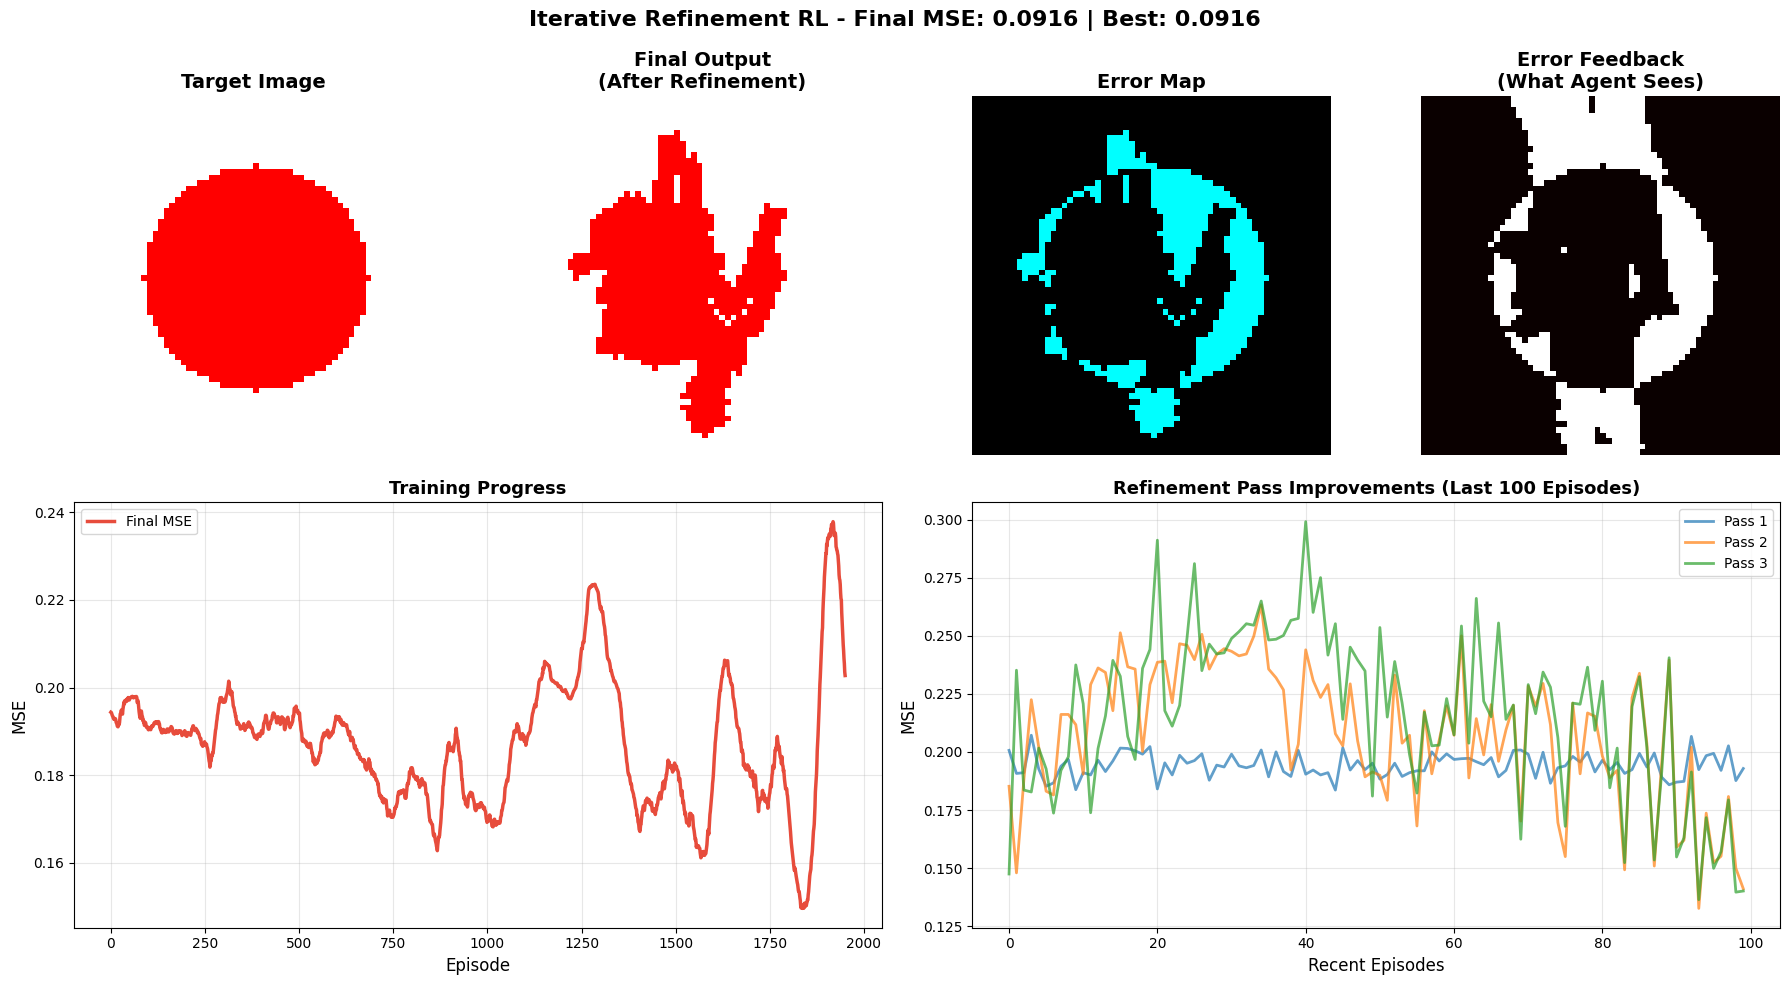

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch.nn.functional as F

class RefinementDrawingEnv:
    """Drawing environment with error feedback for refinement"""
    def __init__(self, canvas_size=64, target_color=[1.0, 0.0, 0.0]):
        self.canvas_size = canvas_size
        self.target_color = np.array(target_color)
        self.target = None
        self.reset()

    def set_target(self, target):
        """Set the target image"""
        self.target = target

    def reset(self):
        """Reset canvas and cursor position"""
        self.canvas = np.ones((self.canvas_size, self.canvas_size, 3), dtype=np.float32)
        self.cursor_x = float(self.canvas_size // 2)
        self.cursor_y = float(self.canvas_size // 2)
        self.step_count = 0
        self.trajectory = [(self.cursor_x, self.cursor_y)]
        return self.get_state()

    def get_state(self, error_map=None):
        """Return canvas + cursor position + optional error feedback"""
        if error_map is None:
            # Initial pass: 5 channels (RGB + cursor + position)
            state = np.zeros((self.canvas_size, self.canvas_size, 5), dtype=np.float32)
            state[:, :, :3] = self.canvas

            cx = int(np.clip(self.cursor_x, 0, self.canvas_size - 1))
            cy = int(np.clip(self.cursor_y, 0, self.canvas_size - 1))

            for dy in range(-2, 3):
                for dx in range(-2, 3):
                    nx, ny = cx + dx, cy + dy
                    if 0 <= nx < self.canvas_size and 0 <= ny < self.canvas_size:
                        state[ny, nx, 3] = 1.0

            state[:, :, 4] = self.cursor_x / self.canvas_size
        else:
            # Refinement pass: 6 channels (RGB + cursor + position + ERROR MAP)
            state = np.zeros((self.canvas_size, self.canvas_size, 6), dtype=np.float32)
            state[:, :, :3] = self.canvas

            cx = int(np.clip(self.cursor_x, 0, self.canvas_size - 1))
            cy = int(np.clip(self.cursor_y, 0, self.canvas_size - 1))

            for dy in range(-2, 3):
                for dx in range(-2, 3):
                    nx, ny = cx + dx, cy + dy
                    if 0 <= nx < self.canvas_size and 0 <= ny < self.canvas_size:
                        state[ny, nx, 3] = 1.0

            state[:, :, 4] = self.cursor_x / self.canvas_size
            state[:, :, 5] = error_map  # ERROR FEEDBACK CHANNEL!

        return state

    def draw_stroke(self, x1, y1, x2, y2):
        """Draw a stroke in the target color"""
        x1 = int(np.clip(x1, 0, self.canvas_size - 1))
        y1 = int(np.clip(y1, 0, self.canvas_size - 1))
        x2 = int(np.clip(x2, 0, self.canvas_size - 1))
        y2 = int(np.clip(y2, 0, self.canvas_size - 1))

        img = Image.fromarray((self.canvas * 255).astype(np.uint8))
        draw = ImageDraw.Draw(img)
        color = tuple((self.target_color * 255).astype(int))
        draw.line([x1, y1, x2, y2], fill=color, width=4)

        self.canvas = np.array(img).astype(np.float32) / 255.0

    def step(self, action, error_map=None):
        """Execute action with optional error feedback"""
        last_x, last_y = self.cursor_x, self.cursor_y

        dx, dy = action[0] * 5, action[1] * 5
        self.cursor_x = np.clip(self.cursor_x + dx, 0, self.canvas_size - 1)
        self.cursor_y = np.clip(self.cursor_y + dy, 0, self.canvas_size - 1)

        self.trajectory.append((self.cursor_x, self.cursor_y))

        if action[2] > 0.5:
            self.draw_stroke(last_x, last_y, self.cursor_x, self.cursor_y)

        self.step_count += 1
        done = action[3] > 0.5 or self.step_count >= 200

        return self.get_state(error_map), done

    def compute_error_map(self):
        """Compute pixel-wise error between canvas and target"""
        if self.target is None:
            return np.zeros((self.canvas_size, self.canvas_size), dtype=np.float32)

        # Compute per-pixel error magnitude
        error = np.mean(np.abs(self.canvas - self.target), axis=2)
        return error


class RefinementPolicyNetwork(nn.Module):
    """Policy network that handles both initial and refinement passes"""
    def __init__(self, canvas_size=64):
        super().__init__()

        # Encoder for initial pass (5 channels)
        self.encoder_initial = nn.Sequential(
            nn.Conv2d(5, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
        )

        # Encoder for refinement pass (6 channels - includes error map!)
        self.encoder_refine = nn.Sequential(
            nn.Conv2d(6, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
        )

        flat_size = 128 * 8 * 8

        self.shared = nn.Sequential(
            nn.Linear(flat_size, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
        )

        self.movement_mean = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Tanh()
        )

        self.movement_std = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Softplus()
        )

        self.draw_head = nn.Sequential(
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

        self.stop_head = nn.Sequential(
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

        self.value_head = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, state, is_refinement=False):
        if len(state.shape) == 3:
            state = state.unsqueeze(0)

        state = state.permute(0, 3, 1, 2)

        # Use appropriate encoder based on pass type
        if is_refinement and state.shape[1] == 6:
            features = self.encoder_refine(state)
        else:
            features = self.encoder_initial(state)

        shared = self.shared(features)

        movement_mean = self.movement_mean(shared)
        movement_std = self.movement_std(shared) + 0.1

        draw_prob = self.draw_head(shared)
        stop_prob = self.stop_head(shared)

        value = self.value_head(shared)

        return movement_mean, movement_std, draw_prob, stop_prob, value


class RefinementRLDrawer:
    """RL painter with error feedback and refinement passes"""
    def __init__(self, target_image, canvas_size=64, num_refinement_passes=2):
        self.env = RefinementDrawingEnv(canvas_size, target_color=[1.0, 0.0, 0.0])
        self.policy = RefinementPolicyNetwork(canvas_size)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=3e-4)

        if isinstance(target_image, np.ndarray):
            self.target = target_image
        else:
            self.target = np.array(target_image.resize((canvas_size, canvas_size))).astype(np.float32) / 255.0

        self.env.set_target(self.target)
        self.num_refinement_passes = num_refinement_passes

        self.best_mse = float('inf')
        self.best_canvas = None
        self.mse_history = []
        self.pass_improvements = []

    def compute_reward(self, prev_canvas, curr_canvas, done, step_count):
        """Dense reward: immediate feedback on improvement"""
        prev_mse = np.mean((prev_canvas - self.target) ** 2)
        curr_mse = np.mean((curr_canvas - self.target) ** 2)

        # Dense improvement reward
        improvement = (prev_mse - curr_mse) * 2000

        # Small step penalty
        step_penalty = -0.01

        # Completion bonus
        if done and curr_mse < 0.03:
            completion_bonus = 10.0
        elif done and curr_mse < 0.05:
            completion_bonus = 5.0
        else:
            completion_bonus = 0

        reward = improvement + step_penalty + completion_bonus

        return reward, curr_mse

    def run_pass(self, is_refinement=False, error_map=None):
        """Run one drawing pass (initial or refinement)"""
        state = self.env.get_state(error_map)
        prev_canvas = self.env.canvas.copy()

        states, actions, rewards = [], [], []
        is_refinement_flags = []

        done = False
        pass_reward = 0

        while not done:
            state_tensor = torch.FloatTensor(state)

            with torch.no_grad():
                movement_mean, movement_std, draw_prob, stop_prob, value = self.policy(state_tensor, is_refinement)

                movement_dist = torch.distributions.Normal(movement_mean, movement_std)
                movement = movement_dist.sample()

                draw = torch.bernoulli(draw_prob)
                stop = torch.bernoulli(stop_prob)

                action_tensor = torch.cat([movement[0], draw[0], stop[0]])
                action = action_tensor.numpy()

            next_state, done = self.env.step(action, error_map)

            reward, mse = self.compute_reward(prev_canvas, self.env.canvas, done, self.env.step_count)

            states.append(state)
            actions.append(action_tensor)
            rewards.append(reward)
            is_refinement_flags.append(is_refinement)

            pass_reward += reward
            prev_canvas = self.env.canvas.copy()
            state = next_state

        return states, actions, rewards, is_refinement_flags, pass_reward, mse

    def train_episode(self):
        """Run episode with initial pass + refinement passes"""
        self.env.reset()

        all_states, all_actions, all_rewards, all_is_refinement = [], [], [], []
        pass_mses = []

        # PASS 1: Initial drawing (no error feedback)
        states, actions, rewards, is_ref, pass_reward, mse = self.run_pass(is_refinement=False)
        all_states.extend(states)
        all_actions.extend(actions)
        all_rewards.extend(rewards)
        all_is_refinement.extend(is_ref)
        pass_mses.append(mse)

        # REFINEMENT PASSES: Agent sees what it missed!
        for refinement_idx in range(self.num_refinement_passes):
            # Compute error map - shows agent what it missed
            error_map = self.env.compute_error_map()

            # Reset cursor for new pass, but keep canvas
            self.env.cursor_x = float(self.env.canvas_size // 2)
            self.env.cursor_y = float(self.env.canvas_size // 2)
            self.env.step_count = 0

            # Run refinement pass with error feedback
            states, actions, rewards, is_ref, pass_reward, mse = self.run_pass(is_refinement=True, error_map=error_map)
            all_states.extend(states)
            all_actions.extend(actions)
            all_rewards.extend(rewards)
            all_is_refinement.extend(is_ref)
            pass_mses.append(mse)

        # Compute returns
        returns = []
        G = 0
        for r in reversed(all_rewards):
            G = r + 0.99 * G
            returns.insert(0, G)

        returns = torch.FloatTensor(returns)
        if len(returns) > 1:
            returns = (returns - returns.mean()) / (returns.std() + 1e-8)

        # Train on all passes
        policy_loss = 0
        value_loss = 0

        for state, action, ret, is_ref in zip(all_states, all_actions, returns, all_is_refinement):
            state_tensor = torch.FloatTensor(state)

            movement_mean, movement_std, draw_prob, stop_prob, value = self.policy(state_tensor, is_ref)

            movement_dist = torch.distributions.Normal(movement_mean, movement_std)
            movement_log_prob = movement_dist.log_prob(action[:2]).sum()

            draw_dist = torch.distributions.Bernoulli(draw_prob)
            draw_log_prob = draw_dist.log_prob(action[2])

            stop_dist = torch.distributions.Bernoulli(stop_prob)
            stop_log_prob = stop_dist.log_prob(action[3])

            total_log_prob = movement_log_prob + draw_log_prob + stop_log_prob

            advantage = ret - value.squeeze().detach()

            policy_loss = policy_loss - total_log_prob * advantage
            value_loss = value_loss + F.mse_loss(value.squeeze(), ret)

        policy_loss = policy_loss / len(all_states)
        value_loss = value_loss / len(all_states)

        loss = policy_loss + 0.5 * value_loss

        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.policy.parameters(), 0.5)
        self.optimizer.step()

        # Track best
        final_mse = pass_mses[-1]
        if final_mse < self.best_mse:
            self.best_mse = final_mse
            self.best_canvas = self.env.canvas.copy()

        self.mse_history.append(final_mse)
        self.pass_improvements.append(pass_mses)

        return sum(all_rewards), pass_mses, self.env.canvas

    def train(self, episodes=2000):
        """Train with refinement"""
        print("=" * 80)
        print("ITERATIVE REFINEMENT RL PAINTER")
        print("=" * 80)
        print(f"Refinement Passes: {self.num_refinement_passes + 1} (1 initial + {self.num_refinement_passes} refinements)")
        print("Feedback: Agent sees ERROR MAP showing what it missed")
        print("Rewards: DENSE (immediate feedback on each improvement)")
        print(f"Training Episodes: {episodes}")
        print("=" * 80)

        for episode in range(episodes):
            reward, pass_mses, canvas = self.train_episode()

            if episode % 50 == 0:
                mse_str = " → ".join([f"{mse:.4f}" for mse in pass_mses])
                improvement = (pass_mses[0] - pass_mses[-1]) / pass_mses[0] * 100 if pass_mses[0] > 0 else 0
                print(f"Ep {episode:4d} | Reward: {reward:8.2f} | MSE: {mse_str} | "
                      f"Improve: {improvement:5.1f}% | Best: {self.best_mse:.4f}")

        return self.best_canvas if self.best_canvas is not None else canvas


# Main execution
if __name__ == "__main__":
    # Create target
    target = np.ones((64, 64, 3), dtype=np.float32)
    y, x = np.ogrid[:64, :64]
    mask = (x - 32)**2 + (y - 32)**2 <= 20**2
    target[mask] = [1.0, 0.0, 0.0]

    # Train with refinement
    drawer = RefinementRLDrawer(target, canvas_size=64, num_refinement_passes=2)
    final_canvas = drawer.train(episodes=2000)

    # Visualize
    fig = plt.figure(figsize=(18, 10))
    gs = fig.add_gridspec(2, 4, height_ratios=[1, 1])

    # Top row: Images
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.imshow(target)
    ax1.set_title("Target Image", fontsize=14, fontweight='bold')
    ax1.axis('off')

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(final_canvas)
    ax2.set_title("Final Output\n(After Refinement)", fontsize=14, fontweight='bold')
    ax2.axis('off')

    ax3 = fig.add_subplot(gs[0, 2])
    diff = np.abs(target - final_canvas)
    ax3.imshow(diff, cmap='hot')
    ax3.set_title("Error Map", fontsize=14, fontweight='bold')
    ax3.axis('off')

    ax4 = fig.add_subplot(gs[0, 3])
    # Show example error feedback
    example_error = drawer.env.compute_error_map()
    ax4.imshow(example_error, cmap='hot')
    ax4.set_title("Error Feedback\n(What Agent Sees)", fontsize=14, fontweight='bold')
    ax4.axis('off')

    # Bottom row: Training curves
    ax5 = fig.add_subplot(gs[1, :2])
    window = 50
    if len(drawer.mse_history) > window:
        smoothed = np.convolve(drawer.mse_history, np.ones(window)/window, mode='valid')
        ax5.plot(smoothed, linewidth=2.5, color='#e74c3c', label='Final MSE')
    else:
        ax5.plot(drawer.mse_history, linewidth=2.5, color='#e74c3c', label='Final MSE')
    ax5.set_xlabel('Episode', fontsize=12)
    ax5.set_ylabel('MSE', fontsize=12)
    ax5.set_title('Training Progress', fontsize=13, fontweight='bold')
    ax5.legend()
    ax5.grid(True, alpha=0.3)

    ax6 = fig.add_subplot(gs[1, 2:])
    # Show pass-by-pass improvements
    if len(drawer.pass_improvements) > 0:
        recent_improvements = drawer.pass_improvements[-100:]
        pass_data = np.array(recent_improvements)
        for i in range(pass_data.shape[1]):
            ax6.plot(pass_data[:, i], alpha=0.7, label=f'Pass {i+1}', linewidth=2)
        ax6.set_xlabel('Recent Episodes', fontsize=12)
        ax6.set_ylabel('MSE', fontsize=12)
        ax6.set_title('Refinement Pass Improvements (Last 100 Episodes)', fontsize=13, fontweight='bold')
        ax6.legend()
        ax6.grid(True, alpha=0.3)

    final_mse = np.mean((final_canvas - target) ** 2)
    plt.suptitle(f"Iterative Refinement RL - Final MSE: {final_mse:.4f} | Best: {drawer.best_mse:.4f}",
                 fontsize=16, y=0.98, fontweight='bold')

    plt.tight_layout()
    plt.savefig('refinement_rl_painter.png', dpi=150, bbox_inches='tight')

    print(f"\n{'='*80}")
    print(f"✓ Training Complete!")
    print(f"  Final MSE: {final_mse:.4f}")
    print(f"  Best MSE achieved: {drawer.best_mse:.4f}")
    print(f"  Average improvement per episode: {np.mean([p[0]-p[-1] for p in drawer.pass_improvements if len(p)>1]):.4f}")
    print(f"  Saved as 'refinement_rl_painter.png'")
    print(f"{'='*80}")
    plt.show()

IMITATION LEARNING + RL PAINTER
Action Space: DISCRETE 16x16 grid
Total Actions: 257 (grid positions + stop)
📚 Collecting Expert Demonstrations...
✓ Collected 6000 state-action pairs from 150 demonstrations

🎓 Phase 1: Behavioral Cloning (Imitation Learning)
Epoch   0 | BC Loss: 2.2156 | Test MSE: 0.1854
Epoch   5 | BC Loss: 0.4483 | Test MSE: 0.1986
Epoch  10 | BC Loss: 0.4367 | Test MSE: 0.1947
Epoch  15 | BC Loss: 0.4291 | Test MSE: 0.1986
Epoch  20 | BC Loss: 0.4291 | Test MSE: 0.1950
Epoch  25 | BC Loss: 0.4257 | Test MSE: 0.1948
Epoch  30 | BC Loss: 0.4275 | Test MSE: 0.1986
Epoch  35 | BC Loss: 0.4239 | Test MSE: 0.1948
Epoch  40 | BC Loss: 0.4249 | Test MSE: 0.1955
Epoch  45 | BC Loss: 0.4215 | Test MSE: 0.1893
✓ Behavioral Cloning Complete!

🚀 Phase 2: RL Fine-tuning
Ep   0 | Reward:   57.62 | MSE: 0.1758 | Steps: 50 | Best: 0.1758
Ep  50 | Reward:   57.62 | MSE: 0.1758 | Steps: 50 | Best: 0.1729
Ep 100 | Reward:   52.73 | MSE: 0.1782 | Steps: 50 | Best: 0.1724
Ep 150 | Reward

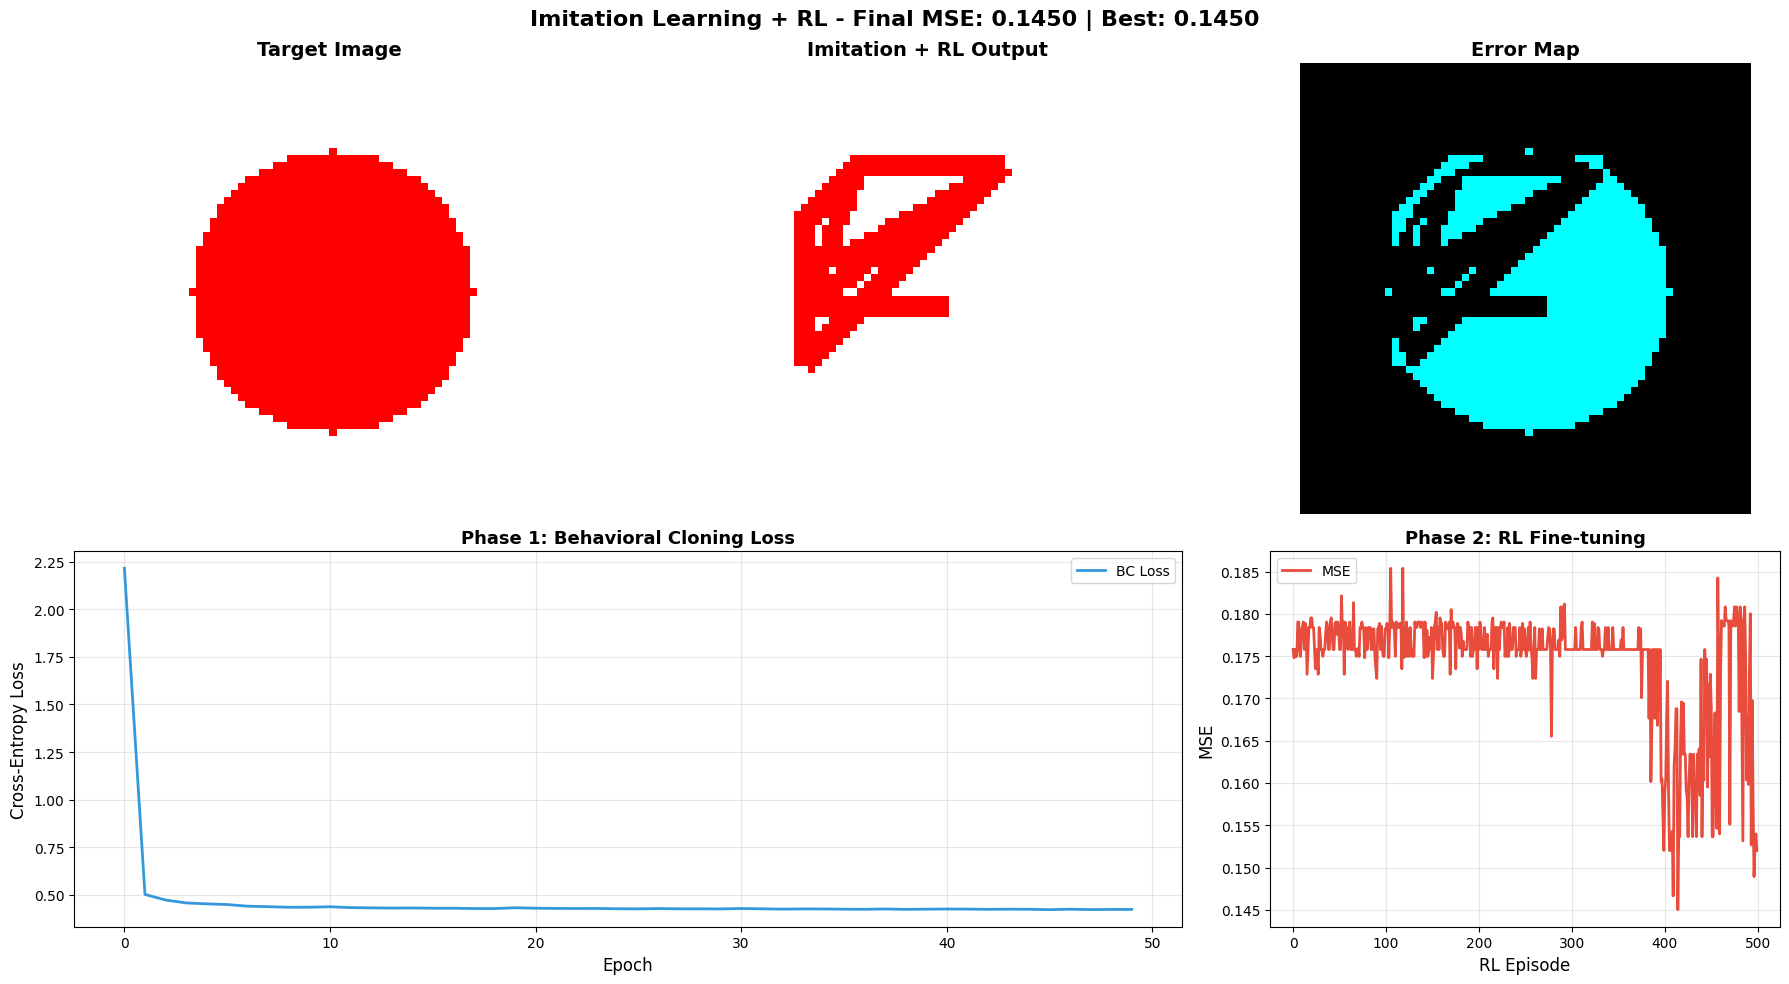

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch.nn.functional as F

class DiscreteDrawingEnv:
    """Drawing environment with DISCRETE grid-based actions"""
    def __init__(self, canvas_size=64, grid_size=16, target_color=[1.0, 0.0, 0.0]):
        self.canvas_size = canvas_size
        self.grid_size = grid_size  # Discrete grid (e.g., 16x16)
        self.cell_size = canvas_size // grid_size
        self.target_color = np.array(target_color)
        self.reset()

    def reset(self):
        """Reset canvas and cursor position"""
        self.canvas = np.ones((self.canvas_size, self.canvas_size, 3), dtype=np.float32)
        self.cursor_grid_x = self.grid_size // 2
        self.cursor_grid_y = self.grid_size // 2
        self.step_count = 0
        self.trajectory = []
        return self.get_state()

    def get_state(self):
        """Return canvas + cursor position as one-hot grid"""
        state = np.zeros((self.canvas_size, self.canvas_size, 4), dtype=np.float32)
        state[:, :, :3] = self.canvas

        # Cursor as one-hot on grid
        cx = self.cursor_grid_x * self.cell_size + self.cell_size // 2
        cy = self.cursor_grid_y * self.cell_size + self.cell_size // 2

        # Mark cursor region
        for dy in range(-3, 4):
            for dx in range(-3, 4):
                nx, ny = cx + dx, cy + dy
                if 0 <= nx < self.canvas_size and 0 <= ny < self.canvas_size:
                    state[ny, nx, 3] = 1.0

        return state

    def grid_to_canvas(self, grid_x, grid_y):
        """Convert grid coordinates to canvas coordinates"""
        canvas_x = grid_x * self.cell_size + self.cell_size // 2
        canvas_y = grid_y * self.cell_size + self.cell_size // 2
        return canvas_x, canvas_y

    def draw_stroke(self, x1, y1, x2, y2):
        """Draw a stroke in the target color"""
        x1 = int(np.clip(x1, 0, self.canvas_size - 1))
        y1 = int(np.clip(y1, 0, self.canvas_size - 1))
        x2 = int(np.clip(x2, 0, self.canvas_size - 1))
        y2 = int(np.clip(y2, 0, self.canvas_size - 1))

        img = Image.fromarray((self.canvas * 255).astype(np.uint8))
        draw = ImageDraw.Draw(img)
        color = tuple((self.target_color * 255).astype(int))
        draw.line([x1, y1, x2, y2], fill=color, width=3)

        self.canvas = np.array(img).astype(np.float32) / 255.0

    def step(self, action):
        """
        Execute discrete action
        action: integer from 0 to grid_size^2 (grid position) or grid_size^2 (stop)
        """
        # Get previous position
        prev_x, prev_y = self.grid_to_canvas(self.cursor_grid_x, self.cursor_grid_y)

        # Check if stop action
        if action >= self.grid_size * self.grid_size:
            return self.get_state(), True

        # Convert action to grid coordinates
        target_grid_x = action % self.grid_size
        target_grid_y = action // self.grid_size

        # Get new position
        new_x, new_y = self.grid_to_canvas(target_grid_x, target_grid_y)

        # Draw stroke from previous to new position
        self.draw_stroke(prev_x, prev_y, new_x, new_y)

        # Update cursor
        self.cursor_grid_x = target_grid_x
        self.cursor_grid_y = target_grid_y
        self.trajectory.append((target_grid_x, target_grid_y))

        self.step_count += 1
        done = self.step_count >= 50  # Max 50 strokes

        return self.get_state(), done


class DiscretePolicyNetwork(nn.Module):
    """Policy network for DISCRETE actions"""
    def __init__(self, canvas_size=64, grid_size=16):
        super().__init__()
        self.grid_size = grid_size
        self.num_actions = grid_size * grid_size + 1  # +1 for stop

        self.encoder = nn.Sequential(
            nn.Conv2d(4, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
        )

        flat_size = 128 * 8 * 8

        # Action head: outputs logits for each discrete action
        self.action_head = nn.Sequential(
            nn.Linear(flat_size, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, self.num_actions)
        )

        # Value head for RL
        self.value_head = nn.Sequential(
            nn.Linear(flat_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, state):
        if len(state.shape) == 3:
            state = state.unsqueeze(0)

        state = state.permute(0, 3, 1, 2)
        features = self.encoder(state)

        action_logits = self.action_head(features)
        value = self.value_head(features)

        return action_logits, value


class ExpertDemonstrator:
    """Generate expert demonstrations for drawing a circle"""
    def __init__(self, canvas_size=64, grid_size=16):
        self.canvas_size = canvas_size
        self.grid_size = grid_size
        self.cell_size = canvas_size // grid_size

    def canvas_to_grid(self, x, y):
        """Convert canvas coordinates to grid coordinates"""
        grid_x = int(x / self.cell_size)
        grid_y = int(y / self.cell_size)
        return np.clip(grid_x, 0, self.grid_size - 1), np.clip(grid_y, 0, self.grid_size - 1)

    def generate_circle_demonstration(self, num_points=40):
        """Generate expert trajectory for drawing a circle"""
        # Circle parameters (centered)
        center_x = self.canvas_size // 2
        center_y = self.canvas_size // 2
        radius = 20

        # Generate points along circle perimeter
        trajectory = []
        angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)

        for angle in angles:
            x = center_x + radius * np.cos(angle)
            y = center_y + radius * np.sin(angle)
            grid_x, grid_y = self.canvas_to_grid(x, y)
            trajectory.append((grid_x, grid_y))

        # Convert to actions
        actions = []
        for grid_x, grid_y in trajectory:
            action = grid_y * self.grid_size + grid_x
            actions.append(action)

        # Add stop action
        actions.append(self.grid_size * self.grid_size)

        return actions

    def generate_demonstrations(self, num_demos=100):
        """Generate multiple expert demonstrations with variations"""
        all_demos = []

        for _ in range(num_demos):
            # Add some variation to starting point
            start_offset = np.random.randint(0, 40)
            demo = self.generate_circle_demonstration(num_points=40)

            # Rotate starting point
            demo_actions = demo[:-1]  # Exclude stop
            rotated = demo_actions[start_offset:] + demo_actions[:start_offset]
            rotated.append(demo[-1])  # Add stop back

            all_demos.append(rotated)

        return all_demos


class ImitationRLDrawer:
    """Imitation Learning + RL for drawing"""
    def __init__(self, target_image, canvas_size=64, grid_size=16):
        self.env = DiscreteDrawingEnv(canvas_size, grid_size)
        self.policy = DiscretePolicyNetwork(canvas_size, grid_size)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=1e-3)

        if isinstance(target_image, np.ndarray):
            self.target = target_image
        else:
            self.target = np.array(target_image.resize((canvas_size, canvas_size))).astype(np.float32) / 255.0

        self.expert = ExpertDemonstrator(canvas_size, grid_size)

        self.best_mse = float('inf')
        self.best_canvas = None
        self.mse_history = []
        self.bc_losses = []

    def collect_expert_data(self, num_demos=100):
        """Collect expert demonstrations"""
        print("📚 Collecting Expert Demonstrations...")
        demonstrations = self.expert.generate_demonstrations(num_demos)

        # Collect state-action pairs
        states = []
        actions = []

        for demo in demonstrations:
            state = self.env.reset()
            for action in demo[:-1]:  # Exclude stop action for training
                states.append(state)
                actions.append(action)
                state, _ = self.env.step(action)

        print(f"✓ Collected {len(states)} state-action pairs from {num_demos} demonstrations")
        return states, actions

    def behavioral_cloning(self, states, actions, epochs=50, batch_size=32):
        """Train policy to imitate expert using supervised learning"""
        print("\n🎓 Phase 1: Behavioral Cloning (Imitation Learning)")
        print("=" * 70)

        states_tensor = torch.FloatTensor(np.array(states))
        actions_tensor = torch.LongTensor(actions)

        dataset_size = len(states)

        for epoch in range(epochs):
            total_loss = 0
            num_batches = 0

            # Shuffle data
            indices = np.random.permutation(dataset_size)

            for i in range(0, dataset_size, batch_size):
                batch_indices = indices[i:i+batch_size]
                batch_states = states_tensor[batch_indices]
                batch_actions = actions_tensor[batch_indices]

                # Forward pass
                action_logits, _ = self.policy(batch_states)

                # Supervised loss: cross-entropy
                loss = F.cross_entropy(action_logits, batch_actions)

                # Backward pass
                self.optimizer.zero_grad()
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.policy.parameters(), 1.0)
                self.optimizer.step()

                total_loss += loss.item()
                num_batches += 1

            avg_loss = total_loss / num_batches
            self.bc_losses.append(avg_loss)

            if epoch % 5 == 0:
                # Test current policy
                test_mse = self.test_policy()
                print(f"Epoch {epoch:3d} | BC Loss: {avg_loss:.4f} | Test MSE: {test_mse:.4f}")

        print("✓ Behavioral Cloning Complete!\n")

    def test_policy(self):
        """Test current policy performance"""
        state = self.env.reset()
        done = False

        with torch.no_grad():
            while not done:
                state_tensor = torch.FloatTensor(state)
                action_logits, _ = self.policy(state_tensor)

                # Greedy action selection
                action = torch.argmax(action_logits).item()

                state, done = self.env.step(action)

        mse = np.mean((self.env.canvas - self.target) ** 2)

        if mse < self.best_mse:
            self.best_mse = mse
            self.best_canvas = self.env.canvas.copy()

        return mse

    def compute_reward(self, prev_canvas, curr_canvas):
        """Dense reward based on improvement"""
        prev_mse = np.mean((prev_canvas - self.target) ** 2)
        curr_mse = np.mean((curr_canvas - self.target) ** 2)
        improvement = (prev_mse - curr_mse) * 2000
        return improvement, curr_mse

    def rl_finetune(self, episodes=500):
        """Fine-tune with RL after imitation learning"""
        print("🚀 Phase 2: RL Fine-tuning")
        print("=" * 70)

        # Lower learning rate for fine-tuning
        self.optimizer = optim.Adam(self.policy.parameters(), lr=3e-4)

        for episode in range(episodes):
            state = self.env.reset()
            prev_canvas = self.env.canvas.copy()

            states, actions, rewards, log_probs, values = [], [], [], [], []
            done = False
            episode_reward = 0

            # Collect trajectory
            while not done:
                state_tensor = torch.FloatTensor(state)
                action_logits, value = self.policy(state_tensor)

                # Sample action
                action_dist = torch.distributions.Categorical(logits=action_logits)
                action = action_dist.sample()
                log_prob = action_dist.log_prob(action)

                next_state, done = self.env.step(action.item())

                reward, mse = self.compute_reward(prev_canvas, self.env.canvas)

                states.append(state)
                actions.append(action)
                rewards.append(reward)
                log_probs.append(log_prob)
                values.append(value)

                episode_reward += reward
                prev_canvas = self.env.canvas.copy()
                state = next_state

            # Compute returns
            returns = []
            G = 0
            for r in reversed(rewards):
                G = r + 0.99 * G
                returns.insert(0, G)

            returns = torch.FloatTensor(returns)
            if len(returns) > 1:
                returns = (returns - returns.mean()) / (returns.std() + 1e-8)

            # Compute loss
            policy_loss = 0
            value_loss = 0

            for log_prob, value, ret in zip(log_probs, values, returns):
                advantage = ret - value.squeeze().detach()
                policy_loss = policy_loss - log_prob * advantage
                value_loss = value_loss + F.mse_loss(value.squeeze(), ret)

            policy_loss = policy_loss / len(log_probs)
            value_loss = value_loss / len(values)
            loss = policy_loss + 0.5 * value_loss

            # Optimize
            self.optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.policy.parameters(), 0.5)
            self.optimizer.step()

            # Track progress
            final_mse = np.mean((self.env.canvas - self.target) ** 2)
            if final_mse < self.best_mse:
                self.best_mse = final_mse
                self.best_canvas = self.env.canvas.copy()

            self.mse_history.append(final_mse)

            if episode % 50 == 0:
                print(f"Ep {episode:3d} | Reward: {episode_reward:7.2f} | MSE: {final_mse:.4f} | "
                      f"Steps: {self.env.step_count:2d} | Best: {self.best_mse:.4f}")

        print("✓ RL Fine-tuning Complete!\n")

    def train(self, bc_epochs=50, rl_episodes=500):
        """Full training pipeline"""
        print("=" * 70)
        print("IMITATION LEARNING + RL PAINTER")
        print("=" * 70)
        print(f"Action Space: DISCRETE {self.env.grid_size}x{self.env.grid_size} grid")
        print(f"Total Actions: {self.policy.num_actions} (grid positions + stop)")
        print("=" * 70)

        # Phase 1: Imitation Learning
        states, actions = self.collect_expert_data(num_demos=150)
        self.behavioral_cloning(states, actions, epochs=bc_epochs)

        # Phase 2: RL Fine-tuning
        self.rl_finetune(episodes=rl_episodes)

        return self.best_canvas


# Main execution
if __name__ == "__main__":
    # Create target
    target = np.ones((64, 64, 3), dtype=np.float32)
    y, x = np.ogrid[:64, :64]
    mask = (x - 32)**2 + (y - 32)**2 <= 20**2
    target[mask] = [1.0, 0.0, 0.0]

    # Train
    drawer = ImitationRLDrawer(target, canvas_size=64, grid_size=16)
    final_canvas = drawer.train(bc_epochs=50, rl_episodes=500)

    # Visualize
    fig = plt.figure(figsize=(18, 10))
    gs = fig.add_gridspec(2, 3, height_ratios=[1.2, 1])

    # Top row: Results
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.imshow(target)
    ax1.set_title("Target Image", fontsize=14, fontweight='bold')
    ax1.axis('off')

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(final_canvas)
    ax2.set_title("Imitation + RL Output", fontsize=14, fontweight='bold')
    ax2.axis('off')

    ax3 = fig.add_subplot(gs[0, 2])
    diff = np.abs(target - final_canvas)
    ax3.imshow(diff, cmap='hot')
    ax3.set_title("Error Map", fontsize=14, fontweight='bold')
    ax3.axis('off')

    # Bottom row: Training curves
    ax4 = fig.add_subplot(gs[1, :2])
    if len(drawer.bc_losses) > 0:
        ax4.plot(drawer.bc_losses, linewidth=2, color='#3498db', label='BC Loss')
        ax4.set_xlabel('Epoch', fontsize=12)
        ax4.set_ylabel('Cross-Entropy Loss', fontsize=12)
        ax4.set_title('Phase 1: Behavioral Cloning Loss', fontsize=13, fontweight='bold')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

    ax5 = fig.add_subplot(gs[1, 2])
    if len(drawer.mse_history) > 0:
        ax5.plot(drawer.mse_history, linewidth=2, color='#e74c3c', label='MSE')
        ax5.set_xlabel('RL Episode', fontsize=12)
        ax5.set_ylabel('MSE', fontsize=12)
        ax5.set_title('Phase 2: RL Fine-tuning', fontsize=13, fontweight='bold')
        ax5.legend()
        ax5.grid(True, alpha=0.3)

    final_mse = np.mean((final_canvas - target) ** 2)
    plt.suptitle(f"Imitation Learning + RL - Final MSE: {final_mse:.4f} | Best: {drawer.best_mse:.4f}",
                 fontsize=16, y=0.98, fontweight='bold')

    plt.tight_layout()
    plt.savefig('imitation_rl_painter.png', dpi=150, bbox_inches='tight')

    print(f"{'='*70}")
    print(f"✓ Training Complete!")
    print(f"  Final MSE: {final_mse:.4f}")
    print(f"  Best MSE: {drawer.best_mse:.4f}")
    print(f"  Improvement: {(0.2 - drawer.best_mse) / 0.2 * 100:.1f}%")
    print(f"  Saved as 'imitation_rl_painter.png'")
    print(f"{'='*70}")
    plt.show()

IMITATION LEARNING + RL WITH COVERAGE FEEDBACK
Action Space: DISCRETE 16x16 grid
Total Actions: 257 (grid positions + stop)
Coverage Info: Agent sees % of target painted in real-time
📚 Collecting Expert Demonstrations...
✓ Collected 7500 state-action pairs from 150 demonstrations

🎓 Phase 1: Behavioral Cloning (Imitation Learning)
Epoch   0 | BC Loss: 2.6993 | Test MSE: 0.1908 | Coverage: 8.0%
Epoch  10 | BC Loss: 0.6667 | Test MSE: 0.1956 | Coverage: 4.7%
Epoch  20 | BC Loss: 0.6512 | Test MSE: 0.1951 | Coverage: 6.8%
Epoch  30 | BC Loss: 0.6464 | Test MSE: 0.1950 | Coverage: 5.6%
Epoch  40 | BC Loss: 0.6449 | Test MSE: 0.1919 | Coverage: 10.0%
Epoch  50 | BC Loss: 0.6430 | Test MSE: 0.1955 | Coverage: 6.2%
Epoch  60 | BC Loss: 0.6424 | Test MSE: 0.1940 | Coverage: 7.4%
Epoch  70 | BC Loss: 0.6419 | Test MSE: 0.1888 | Coverage: 10.3%
Epoch  80 | BC Loss: 0.6409 | Test MSE: 0.1919 | Coverage: 9.5%
Epoch  90 | BC Loss: 0.6395 | Test MSE: 0.1955 | Coverage: 5.4%
✓ Behavioral Cloning Comp

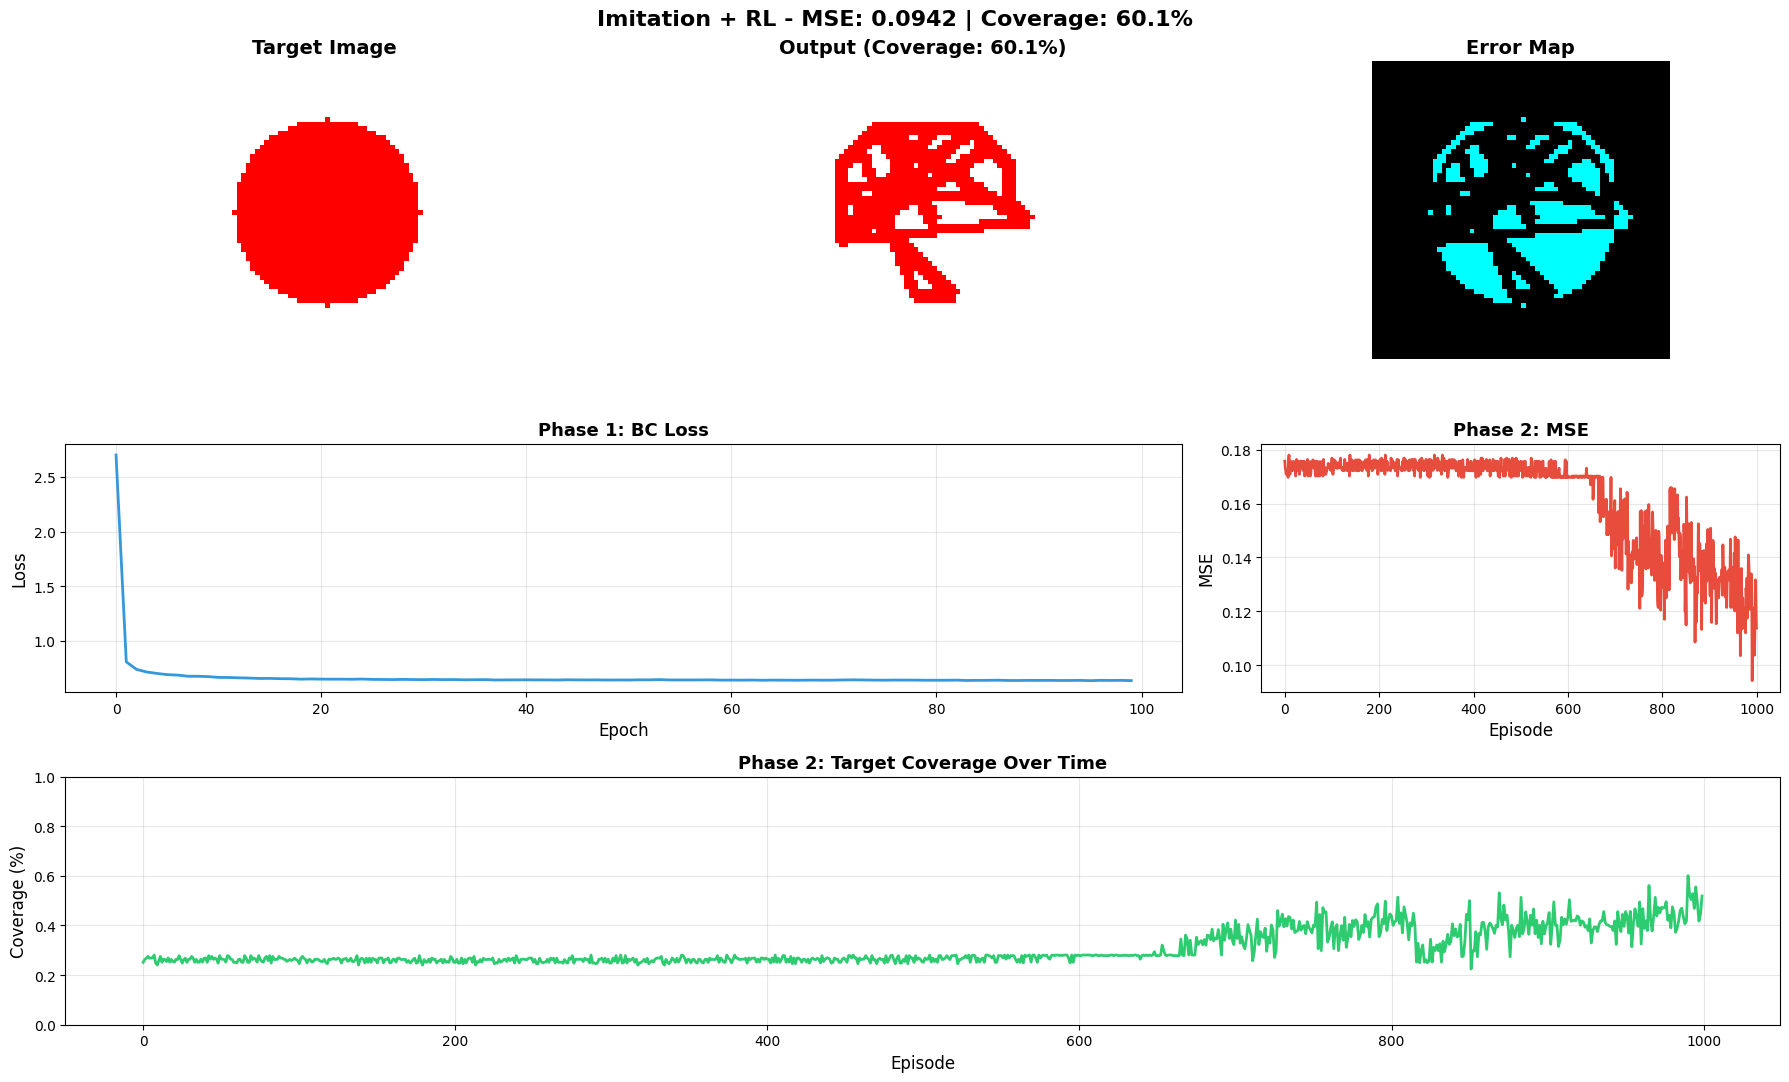

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch.nn.functional as F

class CoverageDrawingEnv:
    """Drawing environment with coverage feedback"""
    def __init__(self, canvas_size=64, grid_size=16, target_color=[1.0, 0.0, 0.0]):
        self.canvas_size = canvas_size
        self.grid_size = grid_size
        self.cell_size = canvas_size // grid_size
        self.target_color = np.array(target_color)
        self.target = None
        self.reset()

    def set_target(self, target):
        """Set the target image"""
        self.target = target

    def reset(self):
        """Reset canvas and cursor position"""
        self.canvas = np.ones((self.canvas_size, self.canvas_size, 3), dtype=np.float32)
        self.cursor_grid_x = self.grid_size // 2
        self.cursor_grid_y = self.grid_size // 2
        self.step_count = 0
        self.trajectory = []
        return self.get_state()

    def compute_coverage(self):
        """Compute how many target pixels are correctly painted"""
        if self.target is None:
            return 0.0

        # Find target pixels (red pixels in this case)
        target_mask = (self.target[:, :, 0] > 0.5) & (self.target[:, :, 1] < 0.5) & (self.target[:, :, 2] < 0.5)
        canvas_mask = (self.canvas[:, :, 0] > 0.5) & (self.canvas[:, :, 1] < 0.5) & (self.canvas[:, :, 2] < 0.5)

        # How many target pixels are painted
        correct_pixels = np.sum(target_mask & canvas_mask)
        total_target_pixels = np.sum(target_mask)

        if total_target_pixels == 0:
            return 0.0

        coverage = correct_pixels / total_target_pixels
        return coverage

    def get_state(self):
        """Return canvas + cursor + COVERAGE INFO"""
        # 5 channels: RGB + cursor + coverage
        state = np.zeros((self.canvas_size, self.canvas_size, 5), dtype=np.float32)
        state[:, :, :3] = self.canvas

        # Cursor position
        cx = self.cursor_grid_x * self.cell_size + self.cell_size // 2
        cy = self.cursor_grid_y * self.cell_size + self.cell_size // 2

        for dy in range(-3, 4):
            for dx in range(-3, 4):
                nx, ny = cx + dx, cy + dy
                if 0 <= nx < self.canvas_size and 0 <= ny < self.canvas_size:
                    state[ny, nx, 3] = 1.0

        # COVERAGE CHANNEL: Fill entire channel with coverage percentage
        coverage = self.compute_coverage()
        state[:, :, 4] = coverage

        return state

    def grid_to_canvas(self, grid_x, grid_y):
        """Convert grid coordinates to canvas coordinates"""
        canvas_x = grid_x * self.cell_size + self.cell_size // 2
        canvas_y = grid_y * self.cell_size + self.cell_size // 2
        return canvas_x, canvas_y

    def draw_stroke(self, x1, y1, x2, y2):
        """Draw a stroke in the target color"""
        x1 = int(np.clip(x1, 0, self.canvas_size - 1))
        y1 = int(np.clip(y1, 0, self.canvas_size - 1))
        x2 = int(np.clip(x2, 0, self.canvas_size - 1))
        y2 = int(np.clip(y2, 0, self.canvas_size - 1))

        img = Image.fromarray((self.canvas * 255).astype(np.uint8))
        draw = ImageDraw.Draw(img)
        color = tuple((self.target_color * 255).astype(int))
        draw.line([x1, y1, x2, y2], fill=color, width=3)

        self.canvas = np.array(img).astype(np.float32) / 255.0

    def step(self, action):
        """
        Execute discrete action
        action: integer from 0 to grid_size^2 (grid position) or grid_size^2 (stop)
        """
        prev_x, prev_y = self.grid_to_canvas(self.cursor_grid_x, self.cursor_grid_y)

        # Check if stop action
        if action >= self.grid_size * self.grid_size:
            return self.get_state(), True

        # Convert action to grid coordinates
        target_grid_x = action % self.grid_size
        target_grid_y = action // self.grid_size

        # Get new position
        new_x, new_y = self.grid_to_canvas(target_grid_x, target_grid_y)

        # Draw stroke
        self.draw_stroke(prev_x, prev_y, new_x, new_y)

        # Update cursor
        self.cursor_grid_x = target_grid_x
        self.cursor_grid_y = target_grid_y
        self.trajectory.append((target_grid_x, target_grid_y))

        self.step_count += 1
        done = self.step_count >= 100  # Increased max steps

        return self.get_state(), done


class CoveragePolicyNetwork(nn.Module):
    """Policy network with coverage awareness"""
    def __init__(self, canvas_size=64, grid_size=16):
        super().__init__()
        self.grid_size = grid_size
        self.num_actions = grid_size * grid_size + 1

        # Encoder now takes 5 channels (RGB + cursor + coverage)
        self.encoder = nn.Sequential(
            nn.Conv2d(5, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
        )

        flat_size = 128 * 8 * 8

        self.action_head = nn.Sequential(
            nn.Linear(flat_size, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, self.num_actions)
        )

        self.value_head = nn.Sequential(
            nn.Linear(flat_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, state):
        if len(state.shape) == 3:
            state = state.unsqueeze(0)

        state = state.permute(0, 3, 1, 2)
        features = self.encoder(state)

        action_logits = self.action_head(features)
        value = self.value_head(features)

        return action_logits, value


class ExpertDemonstrator:
    """Generate expert demonstrations"""
    def __init__(self, canvas_size=64, grid_size=16):
        self.canvas_size = canvas_size
        self.grid_size = grid_size
        self.cell_size = canvas_size // grid_size

    def canvas_to_grid(self, x, y):
        grid_x = int(x / self.cell_size)
        grid_y = int(y / self.cell_size)
        return np.clip(grid_x, 0, self.grid_size - 1), np.clip(grid_y, 0, self.grid_size - 1)

    def generate_circle_demonstration(self, num_points=50):
        """Generate expert trajectory with MORE points for better coverage"""
        center_x = self.canvas_size // 2
        center_y = self.canvas_size // 2
        radius = 20

        trajectory = []
        angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)

        for angle in angles:
            x = center_x + radius * np.cos(angle)
            y = center_y + radius * np.sin(angle)
            grid_x, grid_y = self.canvas_to_grid(x, y)
            trajectory.append((grid_x, grid_y))

        # Convert to actions
        actions = []
        for grid_x, grid_y in trajectory:
            action = grid_y * self.grid_size + grid_x
            actions.append(action)

        # IMPORTANT: Only add stop when trajectory is complete
        actions.append(self.grid_size * self.grid_size)

        return actions

    def generate_demonstrations(self, num_demos=150):
        all_demos = []

        for _ in range(num_demos):
            start_offset = np.random.randint(0, 50)
            demo = self.generate_circle_demonstration(num_points=50)

            demo_actions = demo[:-1]
            rotated = demo_actions[start_offset:] + demo_actions[:start_offset]
            rotated.append(demo[-1])

            all_demos.append(rotated)

        return all_demos


class ImitationRLDrawer:
    """Imitation Learning + RL with coverage feedback"""
    def __init__(self, target_image, canvas_size=64, grid_size=16):
        self.env = CoverageDrawingEnv(canvas_size, grid_size)
        self.policy = CoveragePolicyNetwork(canvas_size, grid_size)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=1e-3)

        if isinstance(target_image, np.ndarray):
            self.target = target_image
        else:
            self.target = np.array(target_image.resize((canvas_size, canvas_size))).astype(np.float32) / 255.0

        self.env.set_target(self.target)
        self.expert = ExpertDemonstrator(canvas_size, grid_size)

        self.best_mse = float('inf')
        self.best_canvas = None
        self.best_coverage = 0.0
        self.mse_history = []
        self.coverage_history = []
        self.bc_losses = []

    def collect_expert_data(self, num_demos=150):
        """Collect expert demonstrations with coverage info"""
        print("📚 Collecting Expert Demonstrations...")
        demonstrations = self.expert.generate_demonstrations(num_demos)

        states = []
        actions = []

        for demo in demonstrations:
            state = self.env.reset()
            for action in demo[:-1]:  # Exclude stop
                states.append(state)
                actions.append(action)
                state, _ = self.env.step(action)

        print(f"✓ Collected {len(states)} state-action pairs from {num_demos} demonstrations")
        return states, actions

    def behavioral_cloning(self, states, actions, epochs=100, batch_size=64):
        """Train with more epochs and larger batches"""
        print("\n🎓 Phase 1: Behavioral Cloning (Imitation Learning)")
        print("=" * 70)

        states_tensor = torch.FloatTensor(np.array(states))
        actions_tensor = torch.LongTensor(actions)

        dataset_size = len(states)

        for epoch in range(epochs):
            total_loss = 0
            num_batches = 0

            indices = np.random.permutation(dataset_size)

            for i in range(0, dataset_size, batch_size):
                batch_indices = indices[i:i+batch_size]
                batch_states = states_tensor[batch_indices]
                batch_actions = actions_tensor[batch_indices]

                action_logits, _ = self.policy(batch_states)
                loss = F.cross_entropy(action_logits, batch_actions)

                self.optimizer.zero_grad()
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.policy.parameters(), 1.0)
                self.optimizer.step()

                total_loss += loss.item()
                num_batches += 1

            avg_loss = total_loss / num_batches
            self.bc_losses.append(avg_loss)

            if epoch % 10 == 0:
                test_mse, test_coverage = self.test_policy()
                print(f"Epoch {epoch:3d} | BC Loss: {avg_loss:.4f} | Test MSE: {test_mse:.4f} | Coverage: {test_coverage:.1%}")

        print("✓ Behavioral Cloning Complete!\n")

    def test_policy(self):
        """Test current policy"""
        state = self.env.reset()
        done = False

        with torch.no_grad():
            while not done:
                state_tensor = torch.FloatTensor(state)
                action_logits, _ = self.policy(state_tensor)
                action = torch.argmax(action_logits).item()
                state, done = self.env.step(action)

        mse = np.mean((self.env.canvas - self.target) ** 2)
        coverage = self.env.compute_coverage()

        if mse < self.best_mse:
            self.best_mse = mse
            self.best_canvas = self.env.canvas.copy()
            self.best_coverage = coverage

        return mse, coverage

    def compute_reward(self, prev_canvas, curr_canvas, done, coverage, prev_coverage):
        """Reward based on MSE improvement AND coverage"""
        prev_mse = np.mean((prev_canvas - self.target) ** 2)
        curr_mse = np.mean((curr_canvas - self.target) ** 2)

        # Dense MSE improvement reward
        improvement_reward = (prev_mse - curr_mse) * 2000

        # Coverage reward: encourage painting more of the target
        coverage_reward = (coverage - prev_coverage) * 100

        # Completion bonus if high coverage AND low MSE
        if done:
            if coverage > 0.9 and curr_mse < 0.05:
                completion_bonus = 50.0
            elif coverage > 0.8 and curr_mse < 0.10:
                completion_bonus = 20.0
            elif coverage < 0.5:  # Penalty for stopping too early
                completion_bonus = -30.0
            else:
                completion_bonus = 0.0
        else:
            completion_bonus = 0.0

        reward = improvement_reward + coverage_reward + completion_bonus
        return reward, curr_mse, coverage

    def rl_finetune(self, episodes=1000):
        """RL fine-tuning with coverage awareness"""
        print("🚀 Phase 2: RL Fine-tuning")
        print("=" * 70)

        self.optimizer = optim.Adam(self.policy.parameters(), lr=3e-4)

        for episode in range(episodes):
            state = self.env.reset()
            prev_canvas = self.env.canvas.copy()
            prev_coverage = 0.0

            states, actions, rewards, log_probs, values = [], [], [], [], []
            done = False
            episode_reward = 0

            while not done:
                state_tensor = torch.FloatTensor(state)
                action_logits, value = self.policy(state_tensor)

                action_dist = torch.distributions.Categorical(logits=action_logits)
                action = action_dist.sample()
                log_prob = action_dist.log_prob(action)

                next_state, done = self.env.step(action.item())

                coverage = self.env.compute_coverage()
                reward, mse, coverage = self.compute_reward(prev_canvas, self.env.canvas, done, coverage, prev_coverage)

                states.append(state)
                actions.append(action)
                rewards.append(reward)
                log_probs.append(log_prob)
                values.append(value)

                episode_reward += reward
                prev_canvas = self.env.canvas.copy()
                prev_coverage = coverage
                state = next_state

            # Compute returns
            returns = []
            G = 0
            for r in reversed(rewards):
                G = r + 0.99 * G
                returns.insert(0, G)

            returns = torch.FloatTensor(returns)
            if len(returns) > 1:
                returns = (returns - returns.mean()) / (returns.std() + 1e-8)

            # Optimize
            policy_loss = 0
            value_loss = 0

            for log_prob, value, ret in zip(log_probs, values, returns):
                advantage = ret - value.squeeze().detach()
                policy_loss = policy_loss - log_prob * advantage
                value_loss = value_loss + F.mse_loss(value.squeeze(), ret)

            policy_loss = policy_loss / len(log_probs)
            value_loss = value_loss / len(values)
            loss = policy_loss + 0.5 * value_loss

            self.optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.policy.parameters(), 0.5)
            self.optimizer.step()

            # Track progress
            final_mse = np.mean((self.env.canvas - self.target) ** 2)
            final_coverage = self.env.compute_coverage()

            if final_mse < self.best_mse:
                self.best_mse = final_mse
                self.best_canvas = self.env.canvas.copy()
                self.best_coverage = final_coverage

            self.mse_history.append(final_mse)
            self.coverage_history.append(final_coverage)

            if episode % 50 == 0:
                print(f"Ep {episode:3d} | Reward: {episode_reward:7.2f} | MSE: {final_mse:.4f} | "
                      f"Coverage: {final_coverage:5.1%} | Steps: {self.env.step_count:2d} | Best: {self.best_mse:.4f}")

        print("✓ RL Fine-tuning Complete!\n")

    def train(self, bc_epochs=100, rl_episodes=1000):
        """Full training pipeline"""
        print("=" * 70)
        print("IMITATION LEARNING + RL WITH COVERAGE FEEDBACK")
        print("=" * 70)
        print(f"Action Space: DISCRETE {self.env.grid_size}x{self.env.grid_size} grid")
        print(f"Total Actions: {self.policy.num_actions} (grid positions + stop)")
        print("Coverage Info: Agent sees % of target painted in real-time")
        print("=" * 70)

        states, actions = self.collect_expert_data(num_demos=150)
        self.behavioral_cloning(states, actions, epochs=bc_epochs)
        self.rl_finetune(episodes=rl_episodes)

        return self.best_canvas


# Main execution
if __name__ == "__main__":
    target = np.ones((64, 64, 3), dtype=np.float32)
    y, x = np.ogrid[:64, :64]
    mask = (x - 32)**2 + (y - 32)**2 <= 20**2
    target[mask] = [1.0, 0.0, 0.0]

    drawer = ImitationRLDrawer(target, canvas_size=64, grid_size=16)
    final_canvas = drawer.train(bc_epochs=100, rl_episodes=1000)

    # Visualize
    fig = plt.figure(figsize=(18, 11))
    gs = fig.add_gridspec(3, 3, height_ratios=[1.2, 1, 1])

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.imshow(target)
    ax1.set_title("Target Image", fontsize=14, fontweight='bold')
    ax1.axis('off')

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(final_canvas)
    ax2.set_title(f"Output (Coverage: {drawer.best_coverage:.1%})", fontsize=14, fontweight='bold')
    ax2.axis('off')

    ax3 = fig.add_subplot(gs[0, 2])
    diff = np.abs(target - final_canvas)
    ax3.imshow(diff, cmap='hot')
    ax3.set_title("Error Map", fontsize=14, fontweight='bold')
    ax3.axis('off')

    ax4 = fig.add_subplot(gs[1, :2])
    if len(drawer.bc_losses) > 0:
        ax4.plot(drawer.bc_losses, linewidth=2, color='#3498db')
        ax4.set_xlabel('Epoch', fontsize=12)
        ax4.set_ylabel('Loss', fontsize=12)
        ax4.set_title('Phase 1: BC Loss', fontsize=13, fontweight='bold')
        ax4.grid(True, alpha=0.3)

    ax5 = fig.add_subplot(gs[1, 2])
    if len(drawer.mse_history) > 0:
        ax5.plot(drawer.mse_history, linewidth=2, color='#e74c3c')
        ax5.set_xlabel('Episode', fontsize=12)
        ax5.set_ylabel('MSE', fontsize=12)
        ax5.set_title('Phase 2: MSE', fontsize=13, fontweight='bold')
        ax5.grid(True, alpha=0.3)

    ax6 = fig.add_subplot(gs[2, :])
    if len(drawer.coverage_history) > 0:
        ax6.plot(drawer.coverage_history, linewidth=2, color='#2ecc71')
        ax6.set_xlabel('Episode', fontsize=12)
        ax6.set_ylabel('Coverage (%)', fontsize=12)
        ax6.set_title('Phase 2: Target Coverage Over Time', fontsize=13, fontweight='bold')
        ax6.set_ylim([0, 1])
        ax6.grid(True, alpha=0.3)

    final_mse = np.mean((final_canvas - target) ** 2)
    plt.suptitle(f"Imitation + RL - MSE: {final_mse:.4f} | Coverage: {drawer.best_coverage:.1%}",
                 fontsize=16, y=0.98, fontweight='bold')

    plt.tight_layout()
    plt.savefig('imitation_rl_painter.png', dpi=150, bbox_inches='tight')

    print(f"{'='*70}")
    print(f"✓ Training Complete!")
    print(f"  Final MSE: {final_mse:.4f}")
    print(f"  Best MSE: {drawer.best_mse:.4f}")
    print(f"  Coverage: {drawer.best_coverage:.1%}")
    print(f"  Saved as 'imitation_rl_painter.png'")
    print(f"{'='*70}")
    plt.show()